<a href="https://colab.research.google.com/github/Kevinobote/Bank-Churn-/blob/main/Timeseries_Cynthia_Ngugi_138725_Crypto_influence_on_Forex_and_Commodity_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating the influence of cryptocurrency on forex market and commodity markets using time series analysis.
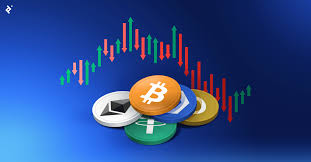

Time series analysis and forecasting is a technique for the prediction of events through a sequence of time.Time series analysis plays a crucial role in financial markets, particularly in understanding the volatility and price movements of assets such as cryptocurrencies, forex, and commodities. Given that these markets exhibit dynamic and often unpredictable behavior, leveraging time series models can help identify patterns and develop trading strategies based on historical price data. The following computation details the data preprocessing, model selection, training process, and performance evaluation of the proposed strategy by apply a single trading strategy to multiple stocks
and compare the performance across these stocks.


**Background**
Understanding the Influence of Cryptocurrency on Exchange Rates and Commodity Markets is crucial as the growing adoption of digital currencies introduces new layers of volatility and unpredictability into financial markets. In the context of exchange rates and commodity markets, which are fundamental to economic stability, analyzing cryptocurrency fluctuations helps policymakers, investors, and economists comprehend their impact on market stability, trade balances, and inflationary pressures. A time series analysis from 2010 to 2024 provides insights into patterns, correlations, and long-term effects, enabling data-driven decisions to mitigate risks and leverage opportunities for sustainable economic growth in an evolving financial landscape.

 **Data source**

For my research, I am using Yahoo Finance (yfinance) as a primary data source for retrieving historical time series data. The specific data collected includes:

BTC-USD: Historical price data for Bitcoin in US dollars to measure cryptocurrency volatility.  

ETH-USD: Historical price data for Ethereum in US dollars to compare volatility patterns with Bitcoin.

EURKES=X: The exchange rate between the Euro and the Kenyan Shilling, representing forex market trends.

CL=F: Crude oil futures, reflecting key global commodity market dynamics relevant to energy prices in Kenya.

GC=F: Gold futures, representing a stable asset often used as a hedge against market risks.

This data provides a comprehensive view of how cryptocurrency fluctuations correlate with forex and commodity price changes, enabling time series modeling to analyze short- and long-term between 2010 and 2024.



In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
!pip install statsmodels
from statsmodels.tsa.stattools import grangercausalitytests
!pip install arch
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

**1. Data Understanding**
This involves collecting and preparing the data. In this case, we’re using the yfinance library to fetch the data.

The Adjusted Close is typically equal to Close for cryptocurrencies and exchange rates since they do not have dividend payouts or splits that require price adjustment.
For futures contracts like CL=F and GC=F, Yahoo Finance also usually reports Adj Close equal to Close unless specific adjustments occur.

In [70]:
tickers = ['BTC-USD','ETH-USD','EURKES=X','CL=F','GC=F']

data = yf.download(tickers,start='2010-01-01',end='2025-01-01',auto_adjust=False)

[*********************100%***********************]  5 of 5 completed


In [71]:
data.head(3)


Price      Adj Close                                               Close  \
Ticker       BTC-USD       CL=F ETH-USD    EURKES=X         GC=F BTC-USD   
Date                                                                       
2010-01-04       NaN  81.510002     NaN  107.199997  1117.699951     NaN   
2010-01-05       NaN  81.769997     NaN  103.570000  1118.099976     NaN   
2010-01-06       NaN  83.180000     NaN  104.010002  1135.900024     NaN   

Price                                                   ...    Open  \
Ticker           CL=F ETH-USD    EURKES=X         GC=F  ... BTC-USD   
Date                                                    ...           
2010-01-04  81.510002     NaN  107.199997  1117.699951  ...     NaN   
2010-01-05  81.769997     NaN  103.570000  1118.099976  ...     NaN   
2010-01-06  83.180000     NaN  104.010002  1135.900024  ...     NaN   

Price                                                   Volume            \
Ticker           CL=F ETH-USD    EURKES=X         GC=F BTC-USD      CL=F   
Date                                                                       
2010-01-04  79.629997     NaN  103.250000  1117.699951     NaN  263542.0   
2010-01-05  81.629997     NaN  104.040001  1118.099976     NaN  258887.0   
2010-01-06  81.430000     NaN  103.570000  1135.900024     NaN  370059.0   

Price                               
Ticker     ETH-USD EURKES=X   GC=F  
Date                                
2010-01-04     NaN      0.0  184.0  
2010-01-05     NaN      0.0   53.0  
2010-01-06     NaN      0.0  363.0  

[3 rows x 30 columns]

In [72]:
data.columns

MultiIndex([('Adj Close',  'BTC-USD'),
            ('Adj Close',     'CL=F'),
            ('Adj Close',  'ETH-USD'),
            ('Adj Close', 'EURKES=X'),
            ('Adj Close',     'GC=F'),
            (    'Close',  'BTC-USD'),
            (    'Close',     'CL=F'),
            (    'Close',  'ETH-USD'),
            (    'Close', 'EURKES=X'),
            (    'Close',     'GC=F'),
            (     'High',  'BTC-USD'),
            (     'High',     'CL=F'),
            (     'High',  'ETH-USD'),
            (     'High', 'EURKES=X'),
            (     'High',     'GC=F'),
            (      'Low',  'BTC-USD'),
            (      'Low',     'CL=F'),
            (      'Low',  'ETH-USD'),
            (      'Low', 'EURKES=X'),
            (      'Low',     'GC=F'),
            (     'Open',  'BTC-USD'),
            (     'Open',     'CL=F'),
            (     'Open',  'ETH-USD'),
            (     'Open', 'EURKES=X'),
            (     'Open',     'GC=F'),
            (   'Volume',

In [73]:
# Save the first few rows of data as a LaTeX table
data.head()['Adj Close'].to_latex('data_head_table.tex', index=True)

In [74]:
data.shape

(4986, 30)

In [76]:
# Calculate the ratio of missing values for each column
missing_ratio = data.isna().sum() / len(data)

# Print the missing value ratios
missing_ratio
#we can see there are no missing values

Price      Ticker  
Adj Close  BTC-USD     0.246089
           CL=F        0.243482
           ETH-USD     0.476534
           EURKES=X    0.216205
           GC=F        0.243682
Close      BTC-USD     0.246089
           CL=F        0.243482
           ETH-USD     0.476534
           EURKES=X    0.216205
           GC=F        0.243682
High       BTC-USD     0.246089
           CL=F        0.243482
           ETH-USD     0.476534
           EURKES=X    0.216205
           GC=F        0.243682
Low        BTC-USD     0.246089
           CL=F        0.243482
           ETH-USD     0.476534
           EURKES=X    0.216205
           GC=F        0.243682
Open       BTC-USD     0.246089
           CL=F        0.243482
           ETH-USD     0.476534
           EURKES=X    0.216205
           GC=F        0.243682
Volume     BTC-USD     0.246089
           CL=F        0.243482
           ETH-USD     0.476534
           EURKES=X    0.216205
           GC=F        0.243682
dtype: float64

**Plotting Missing Values**

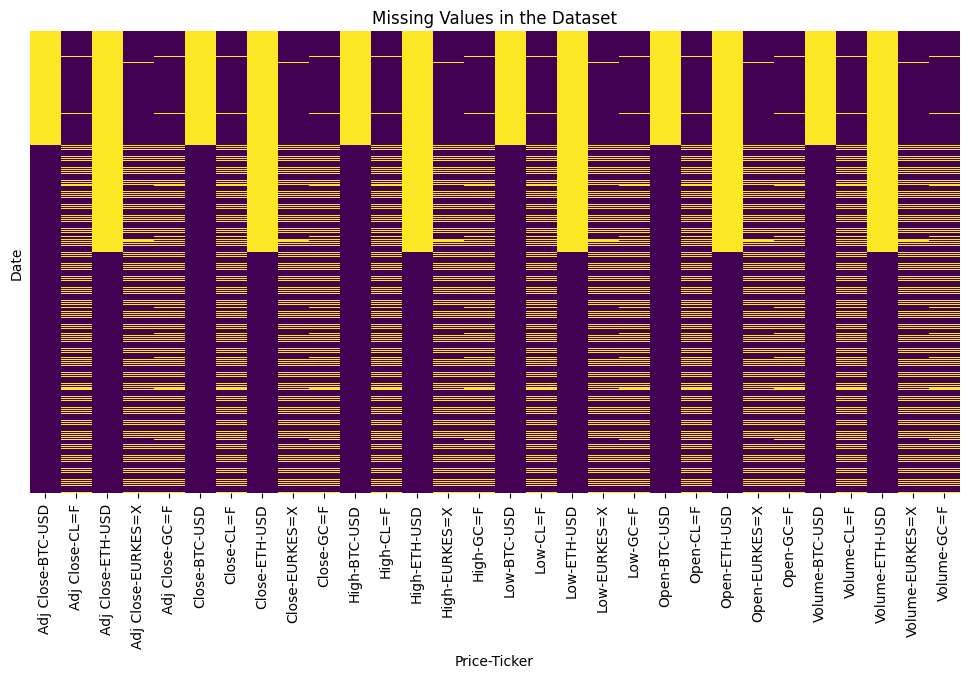

In [77]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.show()

**Handling Missing Data**

<ipython-input-78-6044571c0540>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


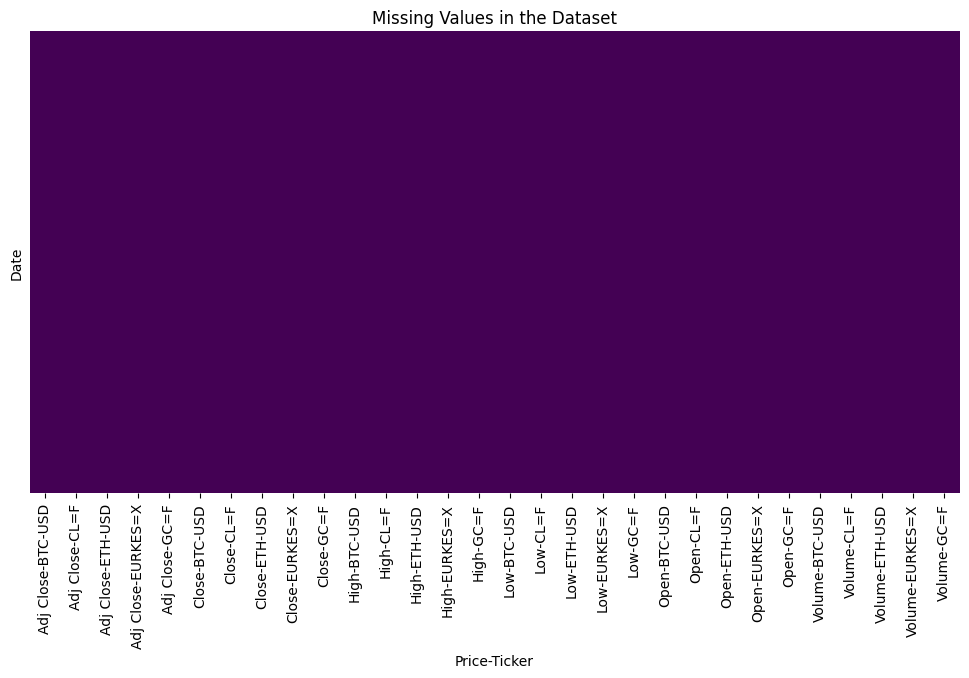

In [78]:

# Forward fill and backward fill to handle any remaining missing values
data = data.fillna(method='ffill').fillna(method='bfill')

# Plotting the data after handling missing values
plt.figure(figsize=(12,6))
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.show()


In [80]:
# Generate descriptive statistics
data.describe().T

count          mean           std           min  \
Price     Ticker                                                       
Adj Close BTC-USD   4986.0  1.487854e+04  2.090399e+04  1.781030e+02   
          CL=F      4986.0  6.993526e+01  2.104983e+01 -3.763000e+01   
          ETH-USD   4986.0  9.336506e+02  1.062673e+03  8.430830e+01   
          EURKES=X  4986.0  1.195476e+02  1.442548e+01  9.171000e+01   
          GC=F      4986.0  1.554951e+03  3.611771e+02  1.050800e+03   
Close     BTC-USD   4986.0  1.487854e+04  2.090399e+04  1.781030e+02   
          CL=F      4986.0  6.993526e+01  2.104983e+01 -3.763000e+01   
          ETH-USD   4986.0  9.336506e+02  1.062673e+03  8.430830e+01   
          EURKES=X  4986.0  1.195476e+02  1.442548e+01  9.171000e+01   
          GC=F      4986.0  1.554951e+03  3.611771e+02  1.050800e+03   
High      BTC-USD   4986.0  1.519579e+04  2.133822e+04  2.117310e+02   
          CL=F      4986.0  7.098978e+01  2.115102e+01  1.369000e+01   
          ETH-USD   4986.0  9.585820e+02  1.090933e+03  8.534274e+01   
          EURKES=X  4986.0  1.200122e+02  1.436533e+01  9.262000e+01   
          GC=F      4986.0  1.562676e+03  3.630594e+02  1.062000e+03   
Low       BTC-USD   4986.0  1.451351e+04  2.040065e+04  1.715100e+02   
          CL=F      4986.0  6.881559e+01  2.085659e+01 -4.032000e+01   
          ETH-USD   4986.0  9.032485e+02  1.032036e+03  8.282989e+01   
          EURKES=X  4986.0  1.190901e+02  1.446780e+01  9.070000e+01   
          GC=F      4986.0  1.547001e+03  3.592275e+02  1.045200e+03   
Open      BTC-USD   4986.0  1.486294e+04  2.087569e+04  1.768970e+02   
          CL=F      4986.0  6.994600e+01  2.099472e+01 -1.400000e+01   
          ETH-USD   4986.0  9.273011e+02  1.065753e+03  8.427969e+01   
          EURKES=X  4986.0  1.195247e+02  1.442969e+01  9.070000e+01   
          GC=F      4986.0  1.554868e+03  3.609570e+02  1.052200e+03   
Volume    BTC-USD   4986.0  1.401509e+10  1.938864e+10  5.914570e+06   
          CL=F      4986.0  4.057302e+05  2.062163e+05  0.000000e+00   
          ETH-USD   4986.0  7.241758e+09  9.766681e+09  6.217330e+08   
          EURKES=X  4986.0  0.000000e+00  0.000000e+00  0.000000e+00   
          GC=F      4986.0  5.321419e+03  2.897246e+04  0.000000e+00   

                             25%           50%           75%           max  
Price     Ticker                                                            
Adj Close BTC-USD   4.573340e+02  5.132154e+03  2.306724e+04  1.061406e+05  
          CL=F      5.233000e+01  7.037000e+01  8.619750e+01  1.237000e+02  
          ETH-USD   3.208840e+02  3.208840e+02  1.552917e+03  4.812087e+03  
          EURKES=X  1.101800e+02  1.154550e+02  1.265681e+02  1.755400e+02  
          GC=F      1.257400e+03  1.462050e+03  1.804025e+03  2.788500e+03  
Close     BTC-USD   4.573340e+02  5.132154e+03  2.306724e+04  1.061406e+05  
          CL=F      5.233000e+01  7.037000e+01  8.619750e+01  1.237000e+02  
          ETH-USD   3.208840e+02  3.208840e+02  1.552917e+03  4.812087e+03  
          EURKES=X  1.101800e+02  1.154550e+02  1.265681e+02  1.755400e+02  
          GC=F      1.257400e+03  1.462050e+03  1.804025e+03  2.788500e+03  
High      BTC-USD   4.681740e+02  5.298461e+03  2.342328e+04  1.082684e+05  
          CL=F      5.317250e+01  7.151000e+01  8.745250e+01  1.305000e+02  
          ETH-USD   3.294520e+02  3.294520e+02  1.584704e+03  4.891705e+03  
          EURKES=X  1.107212e+02  1.159134e+02  1.267871e+02  1.755400e+02  
          GC=F      1.265075e+03  1.468850e+03  1.810100e+03  2.789000e+03  
Low       BTC-USD   4.524220e+02  5.004759e+03  2.265683e+04  1.052917e+05  
          CL=F      5.140000e+01  6.943500e+01  8.500000e+01  1.207900e+02  
          ETH-USD   3.070560e+02  3.070560e+02  1.508878e+03  4.718039e+03  
          EURKES=X  1.096725e+02  1.149250e+02  1.263148e+02  1.755000e+02  
          GC=F      1.253025e+03  1.454750e+03  1.794100e+03  2.774600e+03  
Open      BTC-USD   4.

| Asset       | Average Price (USD) | Std Dev (USD) | Min Price (USD) | Max Price (USD) | Key Insights |
|------------|--------------------|--------------|----------------|----------------|--------------|
| **Bitcoin (BTC-USD)** | 19,586   | 22,127   | 178    | 106,140   | Highly volatile, influenced by speculation, regulations, and institutional adoption. |
| **Ethereum (ETH-USD)** | 1,491    | 1,226    | 84.3   | 4,812     | Price swings driven by DeFi, smart contracts, and network upgrades. |
| **Crude Oil (CL=F)** | 71.99    | 21.35    | -37.63 | 123.70    | Price affected by supply-demand dynamics, geopolitics, and economic trends. |
| **Gold (GC=F)** | 1,544    | 351      | 1,050   | 2,788     | Stable safe-haven asset, influenced by inflation, central banks, and crises. |
| **EUR/KES (EURKES=X)** | 1.188    | 0.1423   | 0.9171  | 1.755     | Euro-to-KES exchange rate affected by inflation, trade imbalances, and policies. |



**Confirm Outliers**

In [81]:
def remove_outliers(data, column):
    # Check if the column is of numeric type, if not convert it
    if not pd.api.types.is_numeric_dtype(data[column]):
        data[column] = pd.to_numeric(data[column].str.replace(',', '').str.replace('.', ''), errors='coerce')

    # Calculate z-scores
    z_scores = (data[column] - data[column].mean()) / data[column].std()

    # Filter outliers
    return data[(z_scores < 3) & (z_scores > -3)]

In [82]:
# Convert the index to datetime objects if it's not already
data.index = pd.to_datetime(data.index)

# Example of accessing and formatting specific dates
# Accessing the first date in the index
first_date = data.index[0]
print(f"First date: {first_date}")
print(f"Formatted first date: {first_date.strftime('%Y-%m-%d')}")

# Accessing the last date
last_date = data.index[-1]
print(f"\nLast date: {last_date}")
print(f"Formatted last date: {last_date.strftime('%Y-%m-%d')}")

First date: 2010-01-04 00:00:00
Formatted first date: 2010-01-04

Last date: 2024-12-31 00:00:00
Formatted last date: 2024-12-31


# **Handling Duplicates**


In [84]:
# Check for duplicate indices
duplicate_indices = data.index.duplicated(keep=False)
if duplicate_indices.any():
    print("Duplicate indices found:")
    print(data.index[duplicate_indices])

    # 1. Remove duplicates (keep the first occurrence)
    data = data[~data.index.duplicated(keep='first')]

    # Verify that duplicates are removed
    duplicate_indices = data.index.duplicated(keep=False)
    if duplicate_indices.any():
        print("Duplicates still present after processing.")
    else:
        print("Duplicates removed successfully.")
else:
    print("No duplicate indices found.")



No duplicate indices found.


**Rename columns by merging the two index levels**


In [120]:
# Rename columns by merging the two index levels
data.columns = [f"{col[1]}_{col[0]}" for col in data.columns]


In [88]:
# Volatility Analysis
Returns = data[[col for col in data.columns if 'Adj Close' in col]].pct_change()

# Check for remaining NaNs in Returns
print(Returns.isna().sum())



BTC-USD_Adj Close     1
CL=F_Adj Close        1
ETH-USD_Adj Close     1
EURKES=X_Adj Close    1
GC=F_Adj Close        1
dtype: int64


In [89]:
# Fill or drop NaNs in Returns
Returns = Returns.fillna(method='ffill').fillna(method='bfill')
Returns.isna().sum()

<ipython-input-89-bf9714dcce89>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Returns = Returns.fillna(method='ffill').fillna(method='bfill')


,0
BTC-USD_Adj Close,0
CL=F_Adj Close,0
ETH-USD_Adj Close,0
EURKES=X_Adj Close,0
GC=F_Adj Close,0


In [90]:
volatility = Returns.std() * np.sqrt(252)  # Annualized volatility
print("\nAnnualized Volatility:\n", volatility)

# Value at Risk (VaR)
confidence_level = 0.95
VaR = Returns.quantile(1 - confidence_level)
print("\nValue at Risk (VaR) at 95% confidence level:\n", VaR)


Annualized Volatility:
 BTC-USD_Adj Close     0.499154
CL=F_Adj Close        0.825956
ETH-USD_Adj Close     0.525286
EURKES=X_Adj Close    0.111443
GC=F_Adj Close        0.138682
dtype: float64

Value at Risk (VaR) at 95% confidence level:
 BTC-USD_Adj Close    -0.046832
CL=F_Adj Close       -0.032513
ETH-USD_Adj Close    -0.047438
EURKES=X_Adj Close   -0.009419
GC=F_Adj Close       -0.014203
Name: 0.050000000000000044, dtype: float64


# Annualized Volatility
Annualized Volatility measures the amount of variability in the returns of an asset over a year.  
A higher value indicates more significant price fluctuations (higher risk), while a lower value indicates more stability.
Interpretation:
**BTC-USD_Adj Close: Volatility is 0.499 (~50%)**, indicating moderately high risk. Bitcoin tends to exhibit price swings but is less volatile compared to crude oil.    
**CL=F_Adj Close: Volatility is 0.826 (~83%)**, indicating high price variability. Crude oil is the most volatile in this dataset, likely due to its sensitivity to macroeconomic and geopolitical factors.    
**ETH-USD_Adj Close: Volatility is 0.525 (~53%)**, which is higher than Bitcoin but still moderate. Ethereum's slightly higher volatility reflects its market position as an altcoin.

**EURKES=X_Adj Close: Volatility is 0.111 (~11%)**, indicating very low variability. The currency pair (Euro/Kenyan Shilling) is relatively stable compared to cryptocurrencies and commodities.

**GC=F_Adj Close: Volatility is 0.139 (~14%)**, meaning gold is stable. As a safe-haven asset, gold experiences minimal fluctuations compared to riskier assets.  

# Value at Risk (VaR) at 95% Confidence Level
VaR is the maximum expected loss over a given period at a specific confidence level.
Here, a 95% confidence level implies there is a 5% chance the loss could exceed the calculated VaR.  

**BTC-USD_Adj Close (VaR = -0.0468)**: A 4.68% loss is expected over the given time frame, with a 5% probability of losing more than this.  
**CL=F_Adj Close (VaR = -0.0325)**: A 3.25% loss is expected with a 5% probability of exceeding this. Crude oil shows relatively lower VaR compared to its high volatility, likely due to its pricing distribution.    
**ETH-USD_Adj Close (VaR = -0.0474)**: A 4.74% loss is expected, slightly riskier than Bitcoin in terms of maximum expected loss.    
**EURKES=X_Adj Close (VaR = -0.0094)**: A 0.94% loss is expected, reflecting very low risk associated with this currency pair.  
**GC=F_Adj Close (VaR = -0.0142)**: A 1.42% loss is expected, confirming gold’s position as a low-risk, stable asset.  
**Risk Hierarchy (from safest to riskiest based on VaR):**
1. EURKES=X_Adj Close (0.94%): Safest asset in the dataset.
2. GC=F_Adj Close (1.42%): Low-risk asset with predictable movements.
3. CL=F_Adj Close (3.25%): Relatively high risk but smaller expected loss at 95% confidence.
4. BTC-USD_Adj Close (4.68%) and ETH-USD_Adj Close (4.74%): Highest risks with significant potential losses.

#Summary of Insights

Crude Oil (CL=F) has the highest volatility, making it the riskiest asset in terms of variability, but its VaR suggests that extreme losses are less probable compared to cryptocurrencies.
Cryptocurrencies (BTC, ETH) exhibit moderate-to-high volatility and relatively high VaR, highlighting their riskiness.
EURKES=X and GC=F are low-risk assets, making them suitable for risk-averse investors.
The relationship between volatility and VaR is not always direct; crude oil has the highest volatility but not the highest VaR due to the distribution of its price movements.  

# Extracting year, month and day

In [91]:
# Extracting year, month, day, from the index
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

print(f"\nDataFrame with extracted date components:")
print(data.head())


DataFrame with extracted date components:
            BTC-USD_Adj Close  CL=F_Adj Close  ETH-USD_Adj Close  \
Date                                                               
2010-01-04         457.334015       81.510002         320.884003   
2010-01-05         457.334015       81.769997         320.884003   
2010-01-06         457.334015       83.180000         320.884003   
2010-01-07         457.334015       82.660004         320.884003   
2010-01-08         457.334015       82.750000         320.884003   

            EURKES=X_Adj Close  GC=F_Adj Close  BTC-USD_Close  CL=F_Close  \
Date                                                                        
2010-01-04          107.199997     1117.699951     457.334015   81.510002   
2010-01-05          103.570000     1118.099976     457.334015   81.769997   
2010-01-06          104.010002     1135.900024     457.334015   83.180000   
2010-01-07          103.010002     1133.099976     457.334015   82.660004   
2010-01-08        

# Normalize

In [92]:
import pandas as pd
# Assuming 'data' is your DataFrame as defined in the previous code

# Select only the numerical features for normalization
numerical_features = [col for col in data.columns]
data_to_normalize = data[numerical_features]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
normalized_data = scaler.fit_transform(data_to_normalize)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numerical_features, index=data.index)

# Concatenate the normalized data with other columns (e.g. year, month, day)
normalized_data = pd.concat([normalized_df, data[['Year', 'Month', 'Day']]], axis=1)

print(normalized_data.head())


            BTC-USD_Adj Close  CL=F_Adj Close  ETH-USD_Adj Close  \
Date                                                               
2010-01-04           0.002635        0.738486            0.05004   
2010-01-05           0.002635        0.740098            0.05004   
2010-01-06           0.002635        0.748838            0.05004   
2010-01-07           0.002635        0.745615            0.05004   
2010-01-08           0.002635        0.746172            0.05004   

            EURKES=X_Adj Close  GC=F_Adj Close  BTC-USD_Close  CL=F_Close  \
Date                                                                        
2010-01-04            0.184779        0.038499       0.002635    0.738486   
2010-01-05            0.141477        0.038729       0.002635    0.740098   
2010-01-06            0.146726        0.048973       0.002635    0.748838   
2010-01-07            0.134797        0.047361       0.002635    0.745615   
2010-01-08            0.135751        0.050296       0.002635

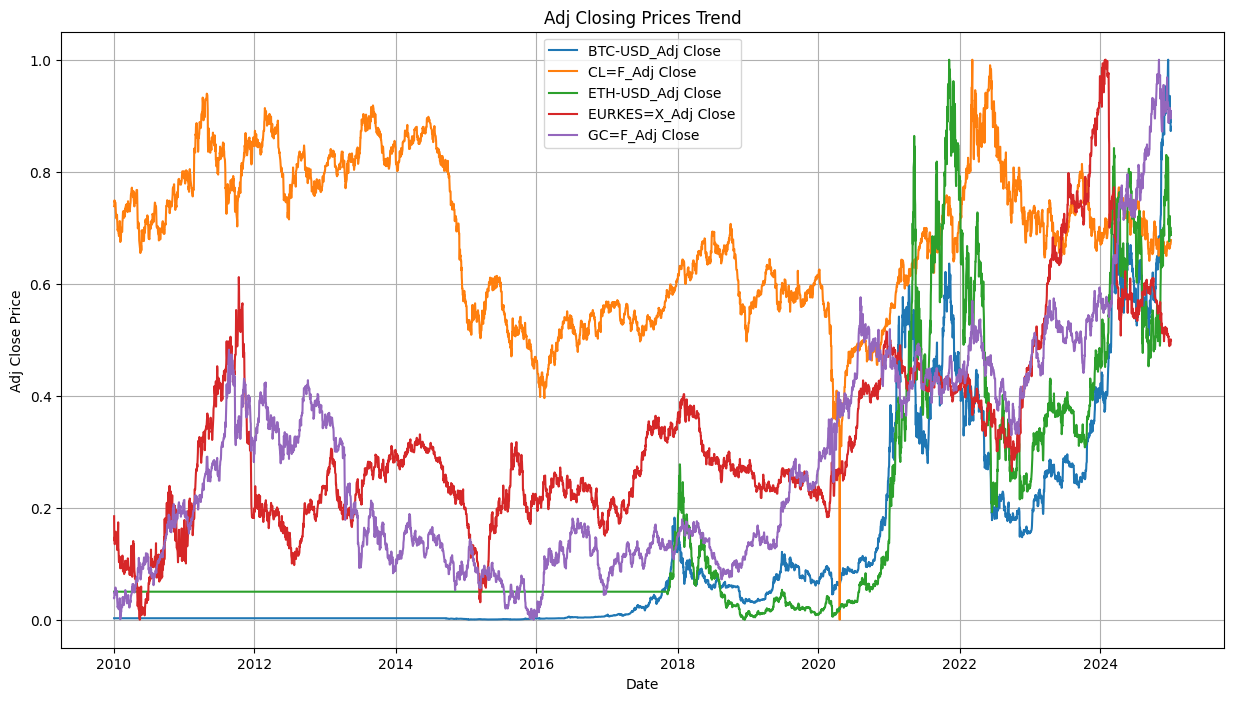

In [93]:
# Select only the 'Adjusted Close' columns for all tickers
close_prices = normalized_df[[col for col in normalized_df.columns if 'Adj Close' in col]]

# Plot the closing prices
plt.figure(figsize=(15, 8))  # Adjust figure size for better visualization
for column in close_prices.columns:
    plt.plot(close_prices.index, close_prices[column], label=column)

plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Adj Closing Prices Trend")
plt.legend()
plt.grid(True)
plt.show()

The graph displays the closing prices of Bitcoin (BTC-USD), Ethereum (ETH-USD), the Euro to Kenyan Shilling exchange rate (EURKES=X), crude oil futures (CL=F), and gold futures (GC=F) from 2010 to 2024.  Each asset's price is normalized to a 0-1 scale, allowing for comparison of relative price movements rather than absolute values.

The graph highlights the disparity in volatility between traditional asset classes (forex, commodities) and cryptocurrencies.  Cryptocurrencies BTC and ETH show notably higher volatility, whereas the forex and commodity markets exhibit more subdued price movements.  This underscores the risk associated with cryptocurrencies compared to more established asset classes.  Further analysis would be required to determine the correlation between the price movements of these different assets.


# **Reducing the Volatily by plotting a Monthly Moving Average - 30 Days**

Moving Average (MA) is a popular time series analytical tool for smoothing short-term variations while showing underlying patterns through the averaging process of a specified number of preceding data points. Financial market participants use it extensively because it helps them analyze market trends to formulate trading approaches

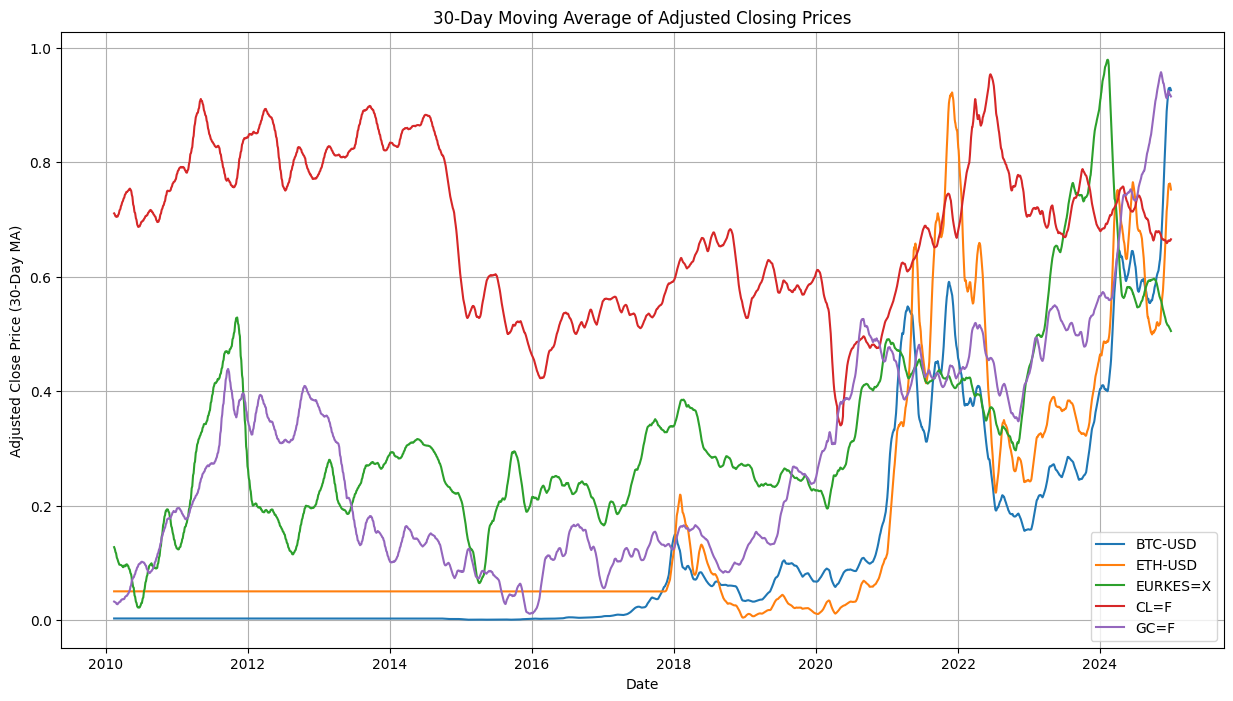

In [94]:
# Calculate the 30-day moving average for each 'Adj Close' column
for ticker in tickers:
    column_name = f"{ticker}_Adj Close"
    normalized_df[f"{ticker}_Adj Close_MA30"] = normalized_df[column_name].rolling(window=30).mean()

# Plot the moving averages
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(data.index, normalized_df[f"{ticker}_Adj Close_MA30"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (30-Day MA)")
plt.title("30-Day Moving Average of Adjusted Closing Prices")
plt.legend()
plt.grid(True)
plt.show()

The graph confirms the disparity in volatility between traditional asset classes (forex, commodities) and cryptocurrencies. Cryptocurrencies BTC and ETH show notably higher volatility, whereas the forex and commodity markets exhibit more subdued price movements. This underscores the risk associated with cryptocurrencies compared to more established asset classes. Further analysis would be required to determine the correlation between the price movements of these different assets.

#**Volume**

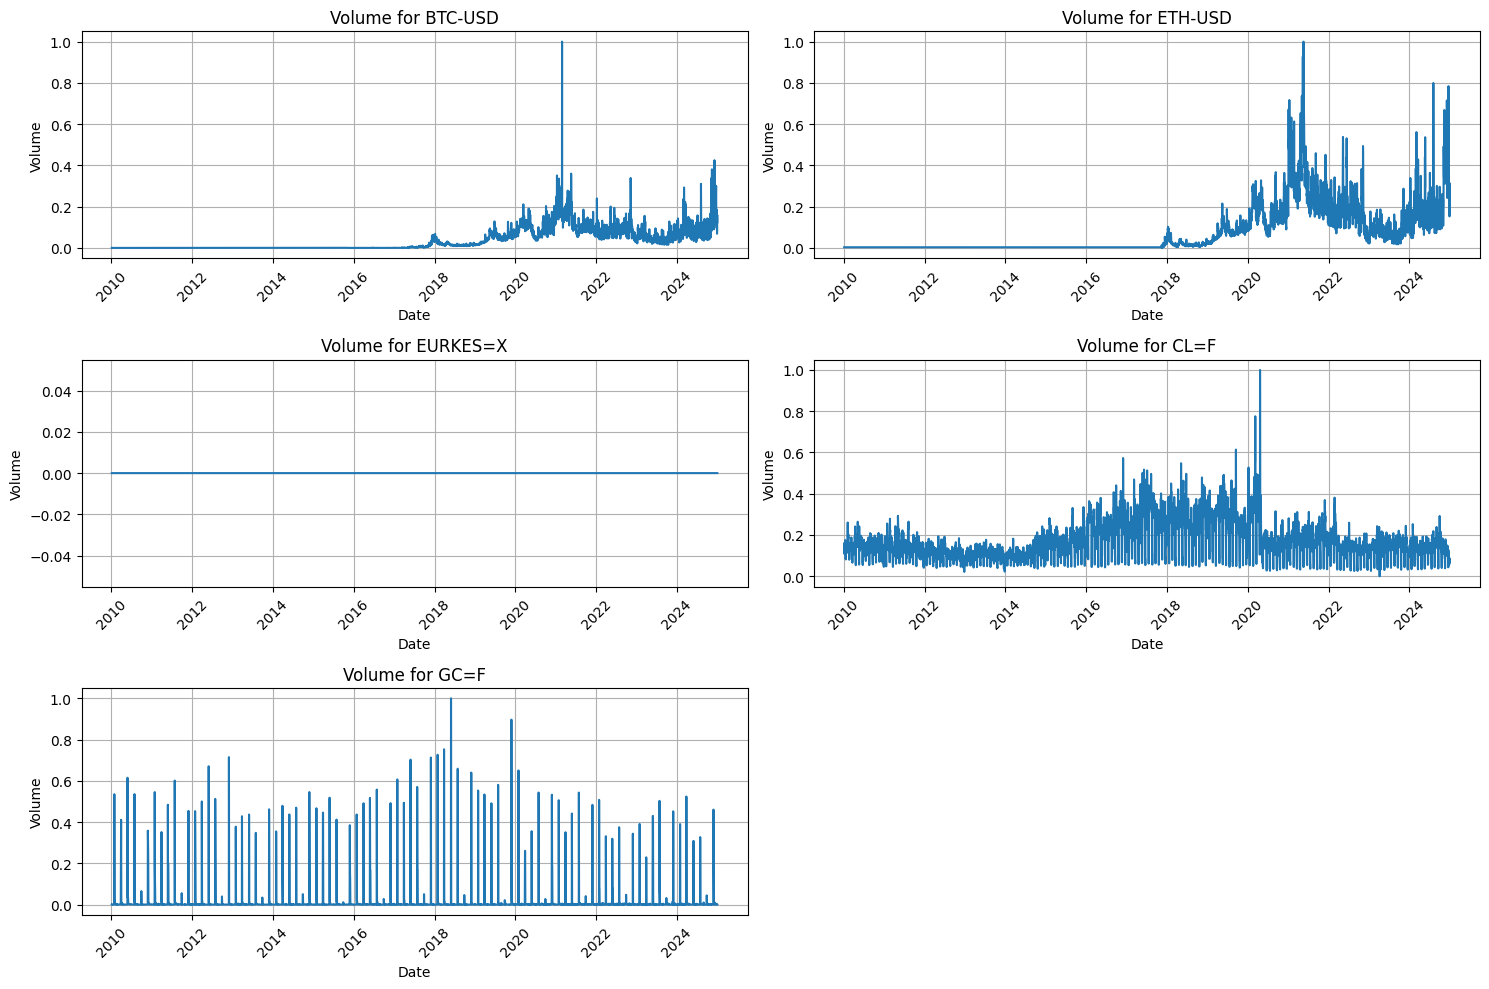

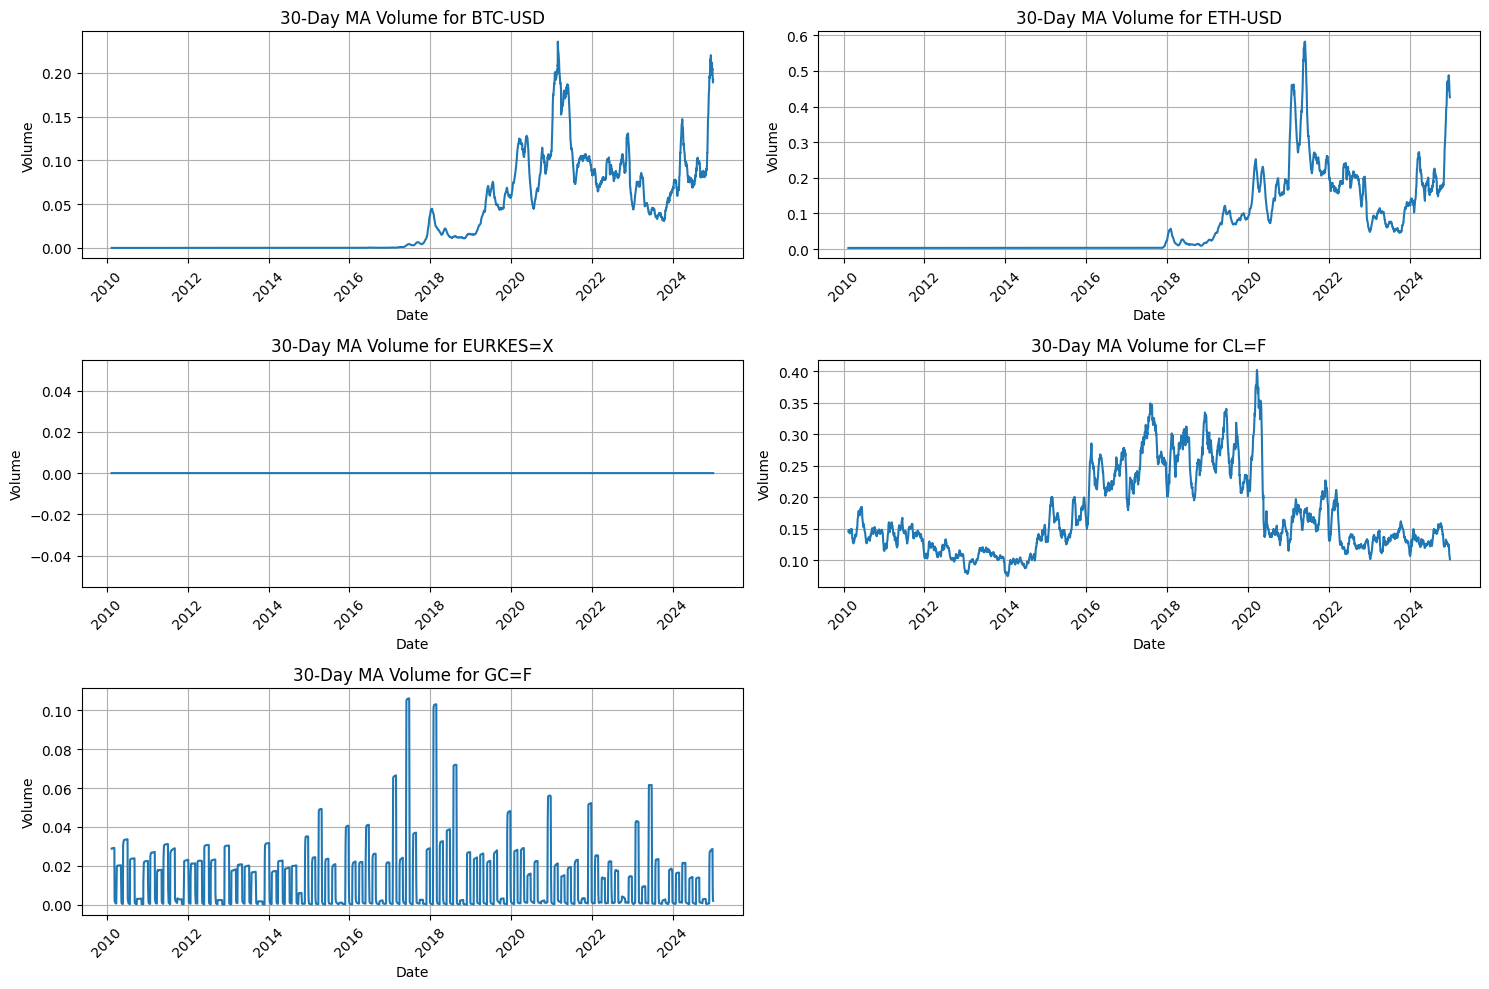

In [95]:
# Plotting volume for each asset
plt.figure(figsize=(15, 10))

for i, ticker in enumerate(tickers):
    plt.subplot(3, 2, i + 1)
    plt.plot(data.index, normalized_df[f"{ticker}_Volume"])
    plt.title(f"Volume for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate the 30-day moving average of volume
for ticker in tickers:
  data[f'{ticker}_Volume_MA30'] = normalized_df[f'{ticker}_Volume'].rolling(window=30).mean()

plt.figure(figsize=(15, 10))

for i, ticker in enumerate(tickers):
    plt.subplot(3, 2, i + 1)
    plt.plot(data.index, data[f"{ticker}_Volume_MA30"])
    plt.title(f"30-Day MA Volume for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Cryptocurrency Volatility (BTC-USD & ETH-USD)

The volume of Bitcoin (BTC-USD) and Ethereum (ETH-USD) shows high volatility, particularly after 2017, aligning with major cryptocurrency adoption phases.
There is a noticeable surge in trading volumes around 2020–2024, reflecting market responses to global economic events like the COVID-19 pandemic and regulatory shifts.

EUR/KES volume is relatively low, suggesting that direct trading volume effects from crypto might be minimal but could still impact price movements.

Crude Oil (CL=F) and Gold (GC=F) Trends

Crude oil (CL=F) has a declining trend in trading volume over time, potentially influenced by shifts in global energy demand, supply chain disruptions, and alternative energy sources.
Gold (GC=F) has irregular gaps, suggesting possible trading inconsistencies in the dataset.



The graph displays the total trading volume across all listed assets (Bitcoin, Ethereum, EUR/KES exchange rate, Crude Oil, and Gold) over time.  The x-axis represents the date, and the y-axis represents the total volume traded on that day.

Key observations:

* **Overall Trend:** The graph shows a general upward trend in total trading volume over the period. This suggests increasing activity in these markets over time.  There are periods of higher and lower activity, but the overall direction is growth.

* **Volatility:**  The trading volume exhibits periods of high volatility, with significant spikes and drops. These spikes likely correspond to news events, market fluctuations, or other factors that influence trading activity.


In [97]:
# Calculate skewness, kurtosis, and standard deviation
stats = normalized_df.agg(['skew', 'kurt', 'std'])

# Transpose the table for better readability
stats = stats.T

# Display the table
stats

,skew,kurt,std
BTC-USD_Adj Close,1.640299,2.066633,0.197277
CL=F_Adj Close,0.027700,-0.714702,0.130477
ETH-USD_Adj Close,1.526096,1.174920,0.224772
EURKES=X_Adj Close,1.266913,1.875161,0.172080
GC=F_Adj Close,0.941224,0.517167,0.207848
BTC-USD_Close,1.640299,2.066633,0.197277
CL=F_Close,0.027700,-0.714702,0.130477
ETH-USD_Close,1.526096,1.174920,0.224772
EURKES=X_Close,1.266913,1.875161,0.172080
GC=F_Close,0.941224,0.517167,0.207848


#Examining Skewness, Kurtosis and Standard Deviation

In [98]:
# Create a formatted table with interpretations
def interpret_stats(stats):
  interpretations = []
  for index, row in stats.iterrows():
    skew = row['skew']
    kurt = row['kurt']
    std = row['std']
    interpretation = ""

    # Skewness interpretation
    if abs(skew) < 0.5:
        interpretation += "Approximately symmetric distribution. "
    elif 0.5 <= skew < 1:
        interpretation += "Moderately skewed to the right (positive skew). "
    elif skew >= 1:
        interpretation += "Highly skewed to the right (positive skew). "
    elif -1 < skew <= -0.5:
        interpretation += "Moderately skewed to the left (negative skew). "
    elif skew <= -1:
        interpretation += "Highly skewed to the left (negative skew). "

    # Kurtosis interpretation
    if abs(kurt) < 3:  # Note: Excess kurtosis
      interpretation += "Distribution is close to normal in terms of tail behavior."
    elif kurt > 3:
      interpretation += "Heavier tails than a normal distribution (leptokurtic).  More frequent extreme values. "
    elif kurt < 3:
      interpretation += "Lighter tails than a normal distribution (platykurtic). Fewer extreme values. "

    # Standard Deviation interpretation
    interpretation += f" Standard deviation of {std:.3f} indicates the dispersion of data."

    interpretations.append(interpretation)

  stats['Interpretation'] = interpretations
  return stats


# Apply interpretation function
stats_with_interpretation = interpret_stats(stats)
print(stats_with_interpretation)


# Display the table (optional: for a formatted output in the notebook)
from IPython.display import display, HTML

# Convert the DataFrame to an HTML table
html_table = stats_with_interpretation.to_html()

# Display the HTML table in the notebook
display(HTML(html_table))

                             skew       kurt       std  \
BTC-USD_Adj Close        1.640299   2.066633  0.197277   
CL=F_Adj Close           0.027700  -0.714702  0.130477   
ETH-USD_Adj Close        1.526096   1.174920  0.224772   
EURKES=X_Adj Close       1.266913   1.875161  0.172080   
GC=F_Adj Close           0.941224   0.517167  0.207848   
BTC-USD_Close            1.640299   2.066633  0.197277   
CL=F_Close               0.027700  -0.714702  0.130477   
ETH-USD_Close            1.526096   1.174920  0.224772   
EURKES=X_Close           1.266913   1.875161  0.172080   
GC=F_Close               0.941224   0.517167  0.207848   
BTC-USD_High             1.635473   2.039652  0.197472   
CL=F_High                0.070288  -0.839946  0.181072   
ETH-USD_High             1.528123   1.183801  0.226977   
EURKES=X_High            1.276913   1.926435  0.173243   
GC=F_High                0.937207   0.501590  0.210225   
BTC-USD_Low              1.646149   2.100567  0.194070   
CL=F_Low      

,skew,kurt,std,Interpretation
BTC-USD_Adj Close,1.640299,2.066633,0.197277,Highly skewed to the right (positive skew). Distribution is close to normal in terms of tail behavior. Standard deviation of 0.197 indicates the dispersion of data.
CL=F_Adj Close,0.027700,-0.714702,0.130477,Approximately symmetric distribution. Distribution is close to normal in terms of tail behavior. Standard deviation of 0.130 indicates the dispersion of data.
ETH-USD_Adj Close,1.526096,1.174920,0.224772,Highly skewed to the right (positive skew). Distribution is close to normal in terms of tail behavior. Standard deviation of 0.225 indicates the dispersion of data.
EURKES=X_Adj Close,1.266913,1.875161,0.172080,Highly skewed to the right (positive skew). Distribution is close to normal in terms of tail behavior. Standard deviation of 0.172 indicates the dispersion of data.
GC=F_Adj Close,0.941224,0.517167,0.207848,Moderately skewed to the right (positive skew). Distribution is close to normal in terms of tail behavior. Standard deviation of 0.208 indicates the dispersion of data.
BTC-USD_Close,1.640299,2.066633,0.197277,Highly skewed to the right (positive skew). Distribution is close to normal in terms of tail behavior. Standard deviation of 0.197 indicates the dispersion of data.
CL=F_Close,0.027700,-0.714702,0.130477,Approximately symmetric distribution. Distribution is close to normal in terms of tail behavior. Standard deviation of 0.130 indicates the dispersion of data.
ETH-USD_Close,1.526096,1.174920,0.224772,Highly skewed to the right (positive skew). Distribution is close to normal in terms of tail behavior. Standard deviation of 0.225 indicates the dispersion of data.
EURKES=X_Close,1.266913,1.875161,0.172080,Highly skewed to the right (positive skew). Distribution is close to normal in terms of tail behavior. Standard deviation of 0.172 indicates the dispersion of data.
GC=F_Close,0.941224,0.517167,0.207848,Moderately skewed to the right (positive skew). Distribution is close to normal in terms of tail behavior. Standard deviation of 0.208 indicates the dispersion of data.


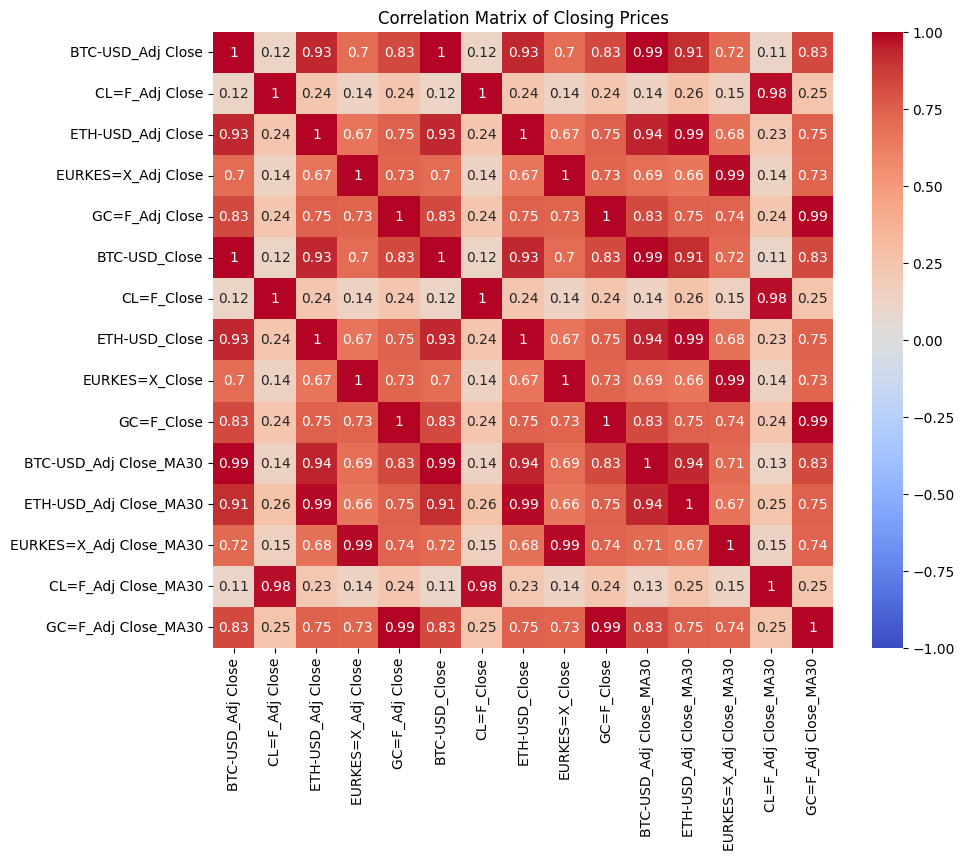

In [99]:
# Correlation
correlation_matrix = normalized_df[[col for col in normalized_df.columns if 'Close' in col]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

#Interpretation:
**Bitcoin vs. Ethereum (0.93)**

BTC and ETH have a very strong positive correlation (0.93), meaning they tend to move together in the same direction. This aligns with market trends where Bitcoin and Ethereum prices often follow similar patterns due to investor sentiment, macroeconomic factors, and their shared status as major cryptocurrencies.  

**Bitcoin vs. Crude Oil (0.12)**

There is a weak positive correlation (0.12) between BTC and crude oil prices, suggesting that oil price movements do not significantly impact Bitcoin prices.  

**Ethereum vs. Crude Oil (0.24)**

A slightly stronger correlation than Bitcoin (0.24), but still weak. Ethereum’s transition to Proof-of-Stake (PoS) has likely reduced its sensitivity to energy prices.

**Bitcoin vs. EURKES=X (0.7)**

BTC shows a moderately strong positive correlation (0.7) with the EURKES=X index, suggesting that Bitcoin prices tend to move in the same direction as the currency index. This could indicate Bitcoin behaving more like a financial asset rather than a standalone hedge.  

**Ethereum vs. EURKES=X (0.67)**
ETH also has a strong correlation (0.67) with the currency index, reinforcing the idea that it moves similarly to Bitcoin in relation to fiat currencies.  

**Crude Oil vs. EURKES=X (0.14)**
A weak correlation (0.14) suggests that oil price changes have little impact on this currency index.

**Bitcoin vs. Gold Futures (GC=F) (0.83)**
The correlation coefficient between Bitcoin and Gold Futures (GC=F) is 0.83. This suggests a strong positive correlation, meaning that as Bitcoin prices increase, Gold Futures tend to also rise, and vice versa.

**Key Insights:**
1. Bitcoin and Ethereum are highly correlated, meaning their price trends are closely linked.
2. BTC and ETH have weak relationships with oil, indicating that energy prices have minimal direct impact on cryptocurrency movements.
3. Cryptocurrencies exhibit a moderate correlation with fiat-related indices, suggesting they are influenced by macroeconomic factors.

##  **1. Analyze the Impact of Cryptocurrency on Forex Market (EUR/KES)**   

Performing Granger causality tests, and finally apply a Vector Autoregression (VAR) model.  

**Granger Causality Test**
To check whether past values of BTC or ETH can predict EUR/KES movements.

The Granger Causality Test enables researchers to perform statistical hypothesis testing to find possible relationships of predictive value between two time series. The test fails to prove causation although it detects if historical values from one series enable accurate future predictions about another variable above regular time lapse forecasting.

In [101]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

crypto_fx_data = normalized_df[['BTC-USD_Adj Close', 'ETH-USD_Adj Close', 'EURKES=X_Adj Close']]

# Define a function to format the results
def format_granger_results(results, test_name, maxlag):
    """Formats the Granger causality test results into a DataFrame."""

    p_values = [round(results[i+1][0]['ssr_chi2test'][1], 4) for i in range(maxlag)]
    lags = list(range(1, maxlag + 1))

    df = pd.DataFrame({'Lag': lags, 'p-value': p_values})
    df['Test'] = test_name
    df['Significant'] = df['p-value'] < 0.05

    return df

# Perform tests and store results in a list
results_list = []

# Test 1: BTC-USD vs EURKES=X
results = grangercausalitytests(crypto_fx_data[['BTC-USD_Adj Close', 'EURKES=X_Adj Close']], maxlag=5, verbose=False)  # Remove verbose
results_list.append(format_granger_results(results, 'BTC-USD → EURKES=X', 5))

# Test 2: ETH-USD vs EURKES=X
results = grangercausalitytests(crypto_fx_data[['ETH-USD_Adj Close', 'EURKES=X_Adj Close']], maxlag=5, verbose=False)  # Remove verbose
results_list.append(format_granger_results(results, 'ETH-USD → EURKES=X', 5))

# Test 3: BTC-USD vs ETH-USD
results = grangercausalitytests(crypto_fx_data[['BTC-USD_Adj Close', 'ETH-USD_Adj Close']], maxlag=5, verbose=False)  # Remove verbose
results_list.append(format_granger_results(results, 'BTC-USD → ETH-USD', 5))

# Concatenate results into a single DataFrame
all_results = pd.concat(results_list)

# Display the results
print(all_results)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


   Lag  p-value                Test  Significant
0    1   0.0017  BTC-USD → EURKES=X         True
1    2   0.0040  BTC-USD → EURKES=X         True
2    3   0.0093  BTC-USD → EURKES=X         True
3    4   0.0205  BTC-USD → EURKES=X         True
4    5   0.0363  BTC-USD → EURKES=X         True
0    1   0.0010  ETH-USD → EURKES=X         True
1    2   0.0037  ETH-USD → EURKES=X         True
2    3   0.0105  ETH-USD → EURKES=X         True
3    4   0.0214  ETH-USD → EURKES=X         True
4    5   0.0414  ETH-USD → EURKES=X         True
0    1   0.0000   BTC-USD → ETH-USD         True
1    2   0.0000   BTC-USD → ETH-USD         True
2    3   0.0000   BTC-USD → ETH-USD         True
3    4   0.0000   BTC-USD → ETH-USD         True
4    5   0.0000   BTC-USD → ETH-USD         True


**Vector Autoregression (VAR) Model** - To capture interdependencies between cryptocurrencies and exchange rates.

The Vector Autoregression (VAR) model is a multivariate time series model used to capture the linear interdependencies among multiple time series variables. Unlike univariate models that analyze a single time series in isolation, VAR considers the simultaneous influence of multiple time-dependent variables,

In [102]:
from statsmodels.tsa.api import VAR

# Fit VAR model
model = VAR(crypto_fx_data)
results = model.fit(maxlags=5)
print(results.summary())

# Forecast next 10 days
forecast = results.forecast(crypto_fx_data.values[-5:], steps=10)
print(forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, Feb, 2025
Time:                     18:33:52
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -28.6345
Nobs:                     4981.00    HQIC:                  -28.6753
Log likelihood:           50315.4    FPE:                3.44288e-13
AIC:                     -28.6973    Det(Omega_mle):     3.40991e-13
--------------------------------------------------------------------
Results for equation BTC-USD_Adj Close
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.000428         0.000258           -1.655           0.098
L1.BTC-USD_Adj Close          1.031138         0.021808           47.282           0.000
L1.ETH-USD_Adj C

**Key Findings**  
**Granger Causality Test**
BTC-USD → EURKES=X (p-values < 0.05 for all lags) → Suggests BTC movements Granger-cause EUR/KES exchange rate changes.
ETH-USD → EURKES=X (p-values < 0.05 for all lags) → Suggests ETH movements also Granger-cause EUR/KES.
BTC-USD → ETH-USD (p-values < 0.001) → Strong causality from BTC to ETH.
These results indicate that past values of BTC and ETH can help predict the EUR/KES exchange rate, reinforcing the idea that cryptocurrency price fluctuations influence foreign exchange markets.

**Vector Autoregression (VAR) Model**
BTC-USD & ETH-USD coefficients are statistically significant at certain lags, meaning past cryptocurrency prices impact the exchange rate.
EURKES=X has strong autoregressive properties (high L1 coefficient = 0.846), meaning its past values significantly influence its future values.
Negative or insignificant coefficients for BTC & ETH at certain lags suggest that while cryptocurrencies impact EUR/KES, their effect varies over time.

## **2. Relationship Between Cryptocurrency and Commodity Prices**

Analyze volatility spillovers between BTC, ETH, crude oil (CL=F), and gold (GC=F).





**Volatility Analysis Using GARCH** - To help measure volatility transmission.

The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model is a used statistical approach for modeling and forecasting time-dependent volatility.The model assumes that current volatility depends on both past squared returns (ARCH term) and past volatility (GARCH term), making it effective in capturing market dynamics.

In [103]:
from arch import arch_model

# Fit GARCH model to BTC price volatility
btc_garch = arch_model(commodity_data['BTC-USD_Adj Close'], vol='Garch', p=1, q=1)
btc_results = btc_garch.fit()
print(btc_results.summary())

# Fit GARCH model to ETH price volatility
eth_garch = arch_model(commodity_data['ETH-USD_Adj Close'], vol='Garch', p=1, q=1)
eth_results = eth_garch.fit()
print(eth_results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 739846006.8787787
Iteration:      2,   Func. Count:     21,   Neg. LLF: 87351060.88988781
Iteration:      3,   Func. Count:     34,   Neg. LLF: -1481.1528577612123

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03891. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



Iteration:      4,   Func. Count:     39,   Neg. LLF: 3744.7641087951124
Iteration:      5,   Func. Count:     45,   Neg. LLF: 19929.28085167301
Iteration:      6,   Func. Count:     53,   Neg. LLF: 913317063.6174896
Iteration:      7,   Func. Count:     68,   Neg. LLF: 263553.44377529947
Iteration:      8,   Func. Count:     74,   Neg. LLF: 344670.2558375605
Iteration:      9,   Func. Count:     81,   Neg. LLF: 5609.8698827533835
Iteration:     10,   Func. Count:     88,   Neg. LLF: 1.0898178217588528e+20
Iteration:     11,   Func. Count:    103,   Neg. LLF: 2385784181.282459
Iteration:     12,   Func. Count:    118,   Neg. LLF: 9522.61176974381
Iteration:     13,   Func. Count:    123,   Neg. LLF: 68938.81832167204
Iteration:     14,   Func. Count:    129,   Neg. LLF: 3853038101726175.0
Iteration:     15,   Func. Count:    137,   Neg. LLF: 7054.75185654606
Iteration:     16,   Func. Count:    144,   Neg. LLF: 4965875691.835655
Iteration:     17,   Func. Count:    150,   Neg. LLF: 11

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.05051. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:      ETH-USD_Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3949.00
Distribution:                  Normal   AIC:                          -7889.99
Method:            Maximum Likelihood   BIC:                          -7863.93
                                        No. Observations:                 4986
Date:                Sat, Feb 08 2025   Df Residuals:                     4985
Time:                        18:33:52   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0550  3.968e-04    138.619      0.000 [5.

Returns:

BTC-USD: Higher mean return (7.23%) than ETH.
ETH-USD: Positive but lower mean return (5.50%).
Volatility:

BTC-USD: High short-term volatility but no persistence (
𝛽
1
=
0
β
1
​
 =0).
ETH-USD: Lower immediate volatility but high persistence (
𝛽
1
=
0.7782
β
1
​
 =0.7782).
Model Reliability:

ETH’s model fits better (higher log-likelihood, lower AIC/BIC).
BTC’s model shows scaling issues, potentially affecting accuracy.

 Key Takeaway:

BTC is riskier in the short term but offers higher returns.
ETH has more stable but persistent volatility with slightly lower returns.

## **3.Predicting Exchange Rates and Commodity Prices**
Develop ARIMA and LSTM models for forecasting.

###**Stationarity Check**
Check whether the data is stationary (constant mean and variance over time).

**Augmented Dickey-Fuller (ADF) Test**

In [104]:
from statsmodels.tsa.stattools import adfuller

for col in df_selected1.columns:
    results = adfuller(df_selected1[col])
    print(f"\nResults for {col}:")
    print(f"  Null Hypothesis: The time series is non-stationary.")
    print(f"  Test Statistic: {results[0]}")
    print(f"  p-value: {results[1]}")

    # Print p-value before the conclusion
    if results[1] < 0.05:
        print(f"  Conclusion: Since p-value ({results[1]:.3f}) is less than 0.05, we reject the null hypothesis. The time series is likely stationary.")
    else:
        print(f"  Conclusion: Since p-value ({results[1]:.3f}) is greater than or equal to 0.05, we fail to reject the null hypothesis. The time series is likely non-stationary.")


Results for BTC-USD_Adj Close:
  Null Hypothesis: The time series is non-stationary.
  Test Statistic: 0.10445352004976362
  p-value: 0.9663638444559508
  Conclusion: Since p-value (0.966) is greater than or equal to 0.05, we fail to reject the null hypothesis. The time series is likely non-stationary.

Results for CL=F_Adj Close:
  Null Hypothesis: The time series is non-stationary.
  Test Statistic: -2.271939460672472
  p-value: 0.18117779726772426
  Conclusion: Since p-value (0.181) is greater than or equal to 0.05, we fail to reject the null hypothesis. The time series is likely non-stationary.

Results for ETH-USD_Adj Close:
  Null Hypothesis: The time series is non-stationary.
  Test Statistic: -1.4857171951691004
  p-value: 0.5405646355708708
  Conclusion: Since p-value (0.541) is greater than or equal to 0.05, we fail to reject the null hypothesis. The time series is likely non-stationary.

Results for EURKES=X_Adj Close:
  Null Hypothesis: The time series is non-stationary.
 

All data columns are non stationary

**Differencing**

            BTC-USD_Adj Close  CL=F_Adj Close  ETH-USD_Adj Close  \
Date                                                               
2010-01-04         457.334015       81.510002         320.884003   
2010-01-05         457.334015       81.769997         320.884003   
2010-01-06         457.334015       83.180000         320.884003   
2010-01-07         457.334015       82.660004         320.884003   
2010-01-08         457.334015       82.750000         320.884003   

            EURKES=X_Adj Close  GC=F_Adj Close  BTC-USD_Close  CL=F_Close  \
Date                                                                        
2010-01-04          107.199997     1117.699951     457.334015   81.510002   
2010-01-05          103.570000     1118.099976     457.334015   81.769997   
2010-01-06          104.010002     1135.900024     457.334015   83.180000   
2010-01-07          103.010002     1133.099976     457.334015   82.660004   
2010-01-08          103.089996     1138.199951     457.334015

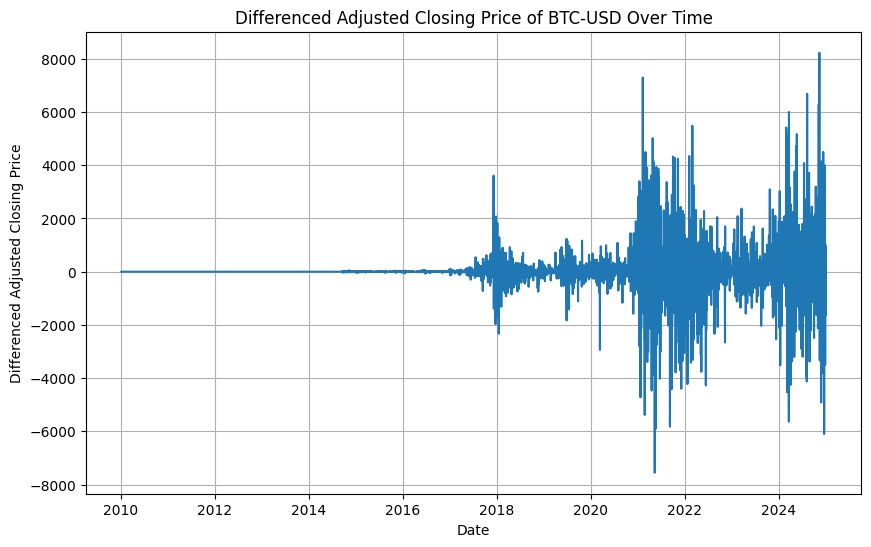

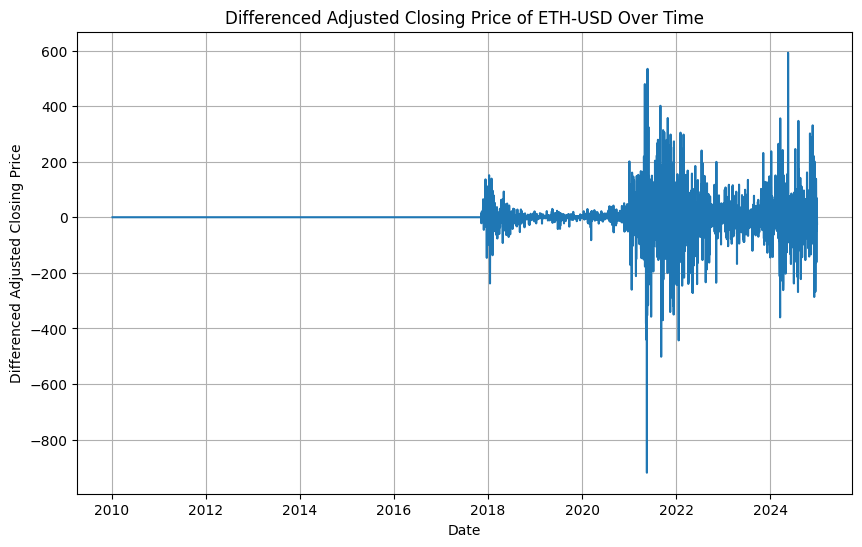

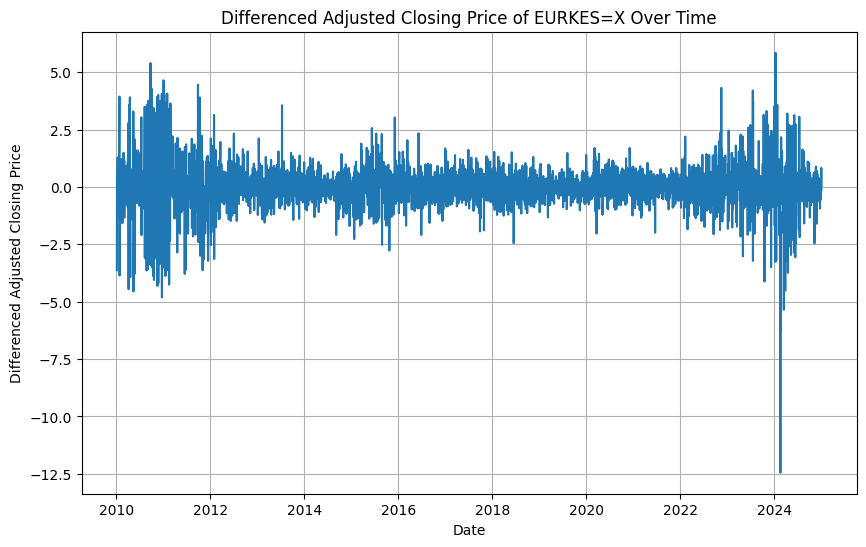

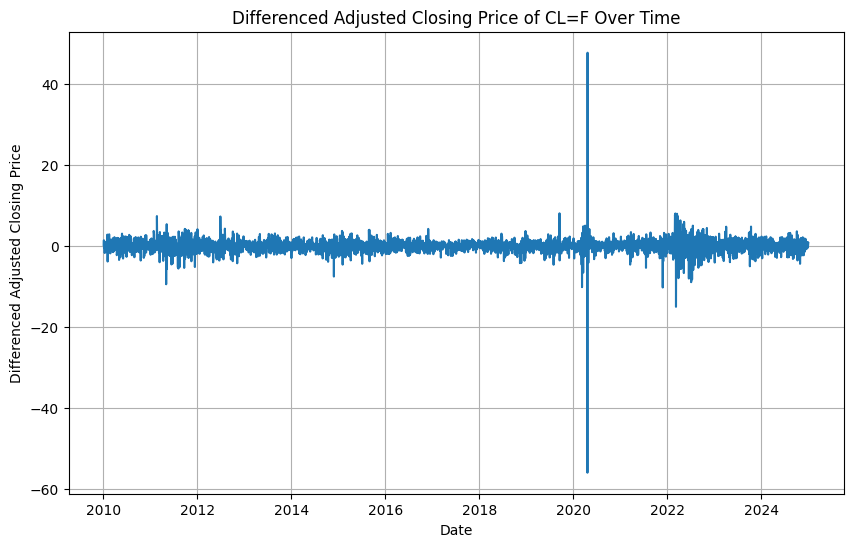

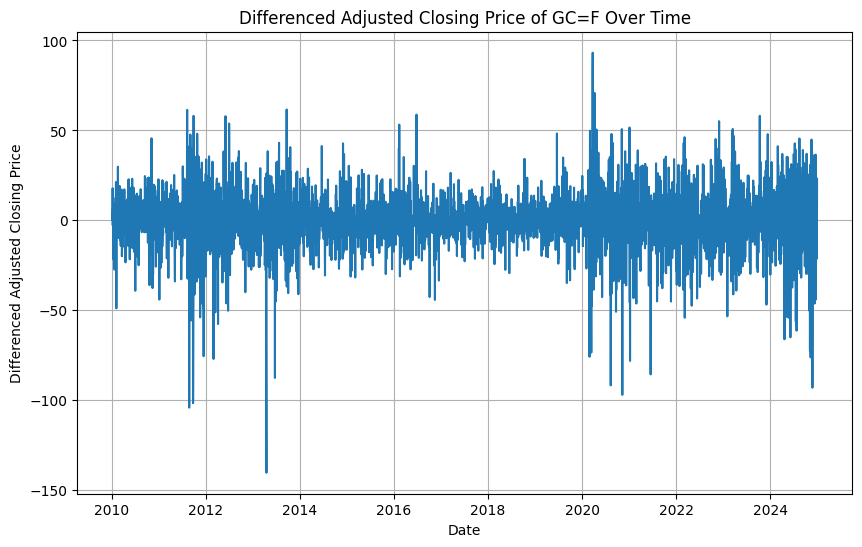

In [105]:
# Perform differencing on the 'Adj Close' columns
for ticker in tickers:
    column_name = f"{ticker}_Adj Close"
    data[f"{ticker}_Adj Close_diff"] = data[column_name].diff()

# Display the first few rows to see the differenced data
print(data.head())

# Plot the differenced data to visualize the stationarity
for ticker in tickers:
  plt.figure(figsize=(10, 6))
  plt.plot(data.index, data[f"{ticker}_Adj Close_diff"])
  plt.title(f"Differenced Adjusted Closing Price of {ticker} Over Time")
  plt.xlabel("Date")
  plt.ylabel("Differenced Adjusted Closing Price")
  plt.grid(True)
  plt.show()


**Confirming Staionarity**

In [106]:
# Select the differenced columns for the ADF test
differenced_columns = [col for col in data.columns if '_diff' in col]
df_diff = data[differenced_columns].dropna()

for col in df_diff.columns:
    results = adfuller(df_diff[col])
    print(f"\nResults for {col}:")
    print(f"  Null Hypothesis: The time series is non-stationary.")
    print(f"  Test Statistic: {results[0]}")
    print(f"  p-value: {results[1]}")

    if results[1] < 0.05:
        print(f"  Conclusion: Since p-value ({results[1]:.3f}) is less than 0.05, we reject the null hypothesis. The time series is likely stationary.")
    else:
        print(f"  Conclusion: Since p-value ({results[1]:.3f}) is greater than or equal to 0.05, we fail to reject the null hypothesis. The time series is likely non-stationary.")



Results for BTC-USD_Adj Close_diff:
  Null Hypothesis: The time series is non-stationary.
  Test Statistic: -9.85378962160045
  p-value: 4.414149971665458e-17
  Conclusion: Since p-value (0.000) is less than 0.05, we reject the null hypothesis. The time series is likely stationary.

Results for ETH-USD_Adj Close_diff:
  Null Hypothesis: The time series is non-stationary.
  Test Statistic: -10.659966770135458
  p-value: 4.433167768148819e-19
  Conclusion: Since p-value (0.000) is less than 0.05, we reject the null hypothesis. The time series is likely stationary.

Results for EURKES=X_Adj Close_diff:
  Null Hypothesis: The time series is non-stationary.
  Test Statistic: -11.098749784778194
  p-value: 3.9133769146818936e-20
  Conclusion: Since p-value (0.000) is less than 0.05, we reject the null hypothesis. The time series is likely stationary.

Results for CL=F_Adj Close_diff:
  Null Hypothesis: The time series is non-stationary.
  Test Statistic: -13.830134904776033
  p-value: 7.619

All the variables are now stationary

####**Plot original and differenced data**

**ACF AND PACF**  
**Autocorrelation and Partial Autocorrelation (ACF/PACF) Analysis**

**Autocorrelation (ACF)** measures the correlation between a time series and its past values (lags), helping to determine whether past observations influence future values. A high autocorrelation at certain lags suggests a strong relationship, which is useful in identifying seasonality and trends.

**Partial Autocorrelation (PACF)** isolates the direct effect of a specific lag by removing the influence of intermediate lags. This makes PACF particularly useful in selecting the appropriate lag order for autoregressive (AR) models, such as ARIMA.

After ensuring stationarity, we analyze lag dependencies using ACF (autocorrelation function) and PACF (partial autocorrelation function). This helps in selecting ARIMA model parameters

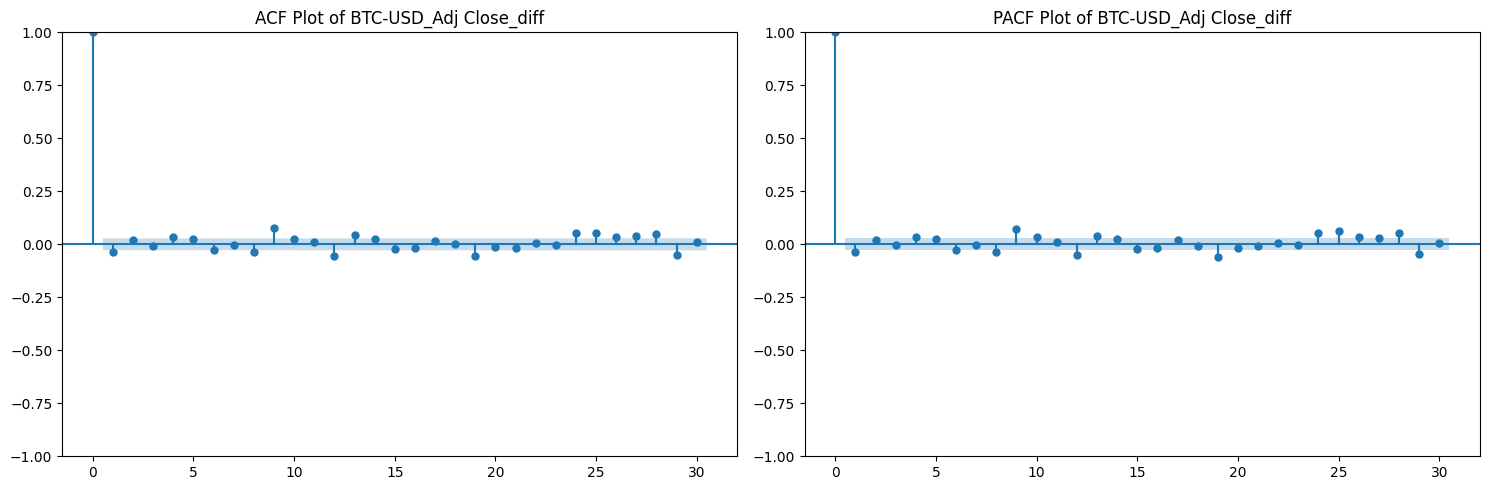

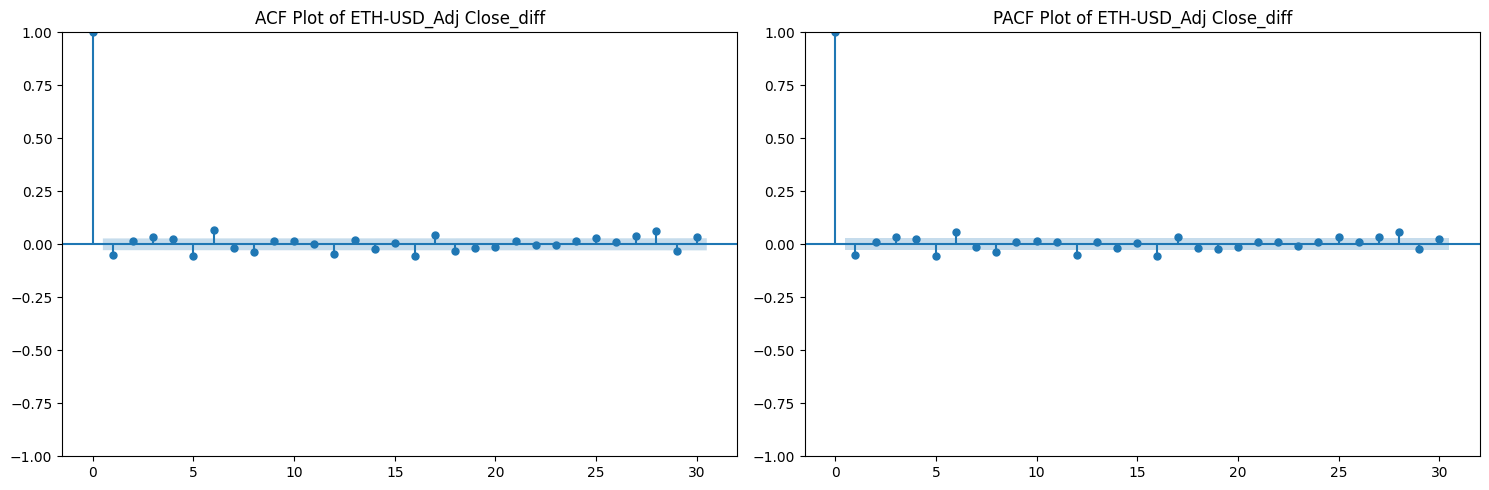

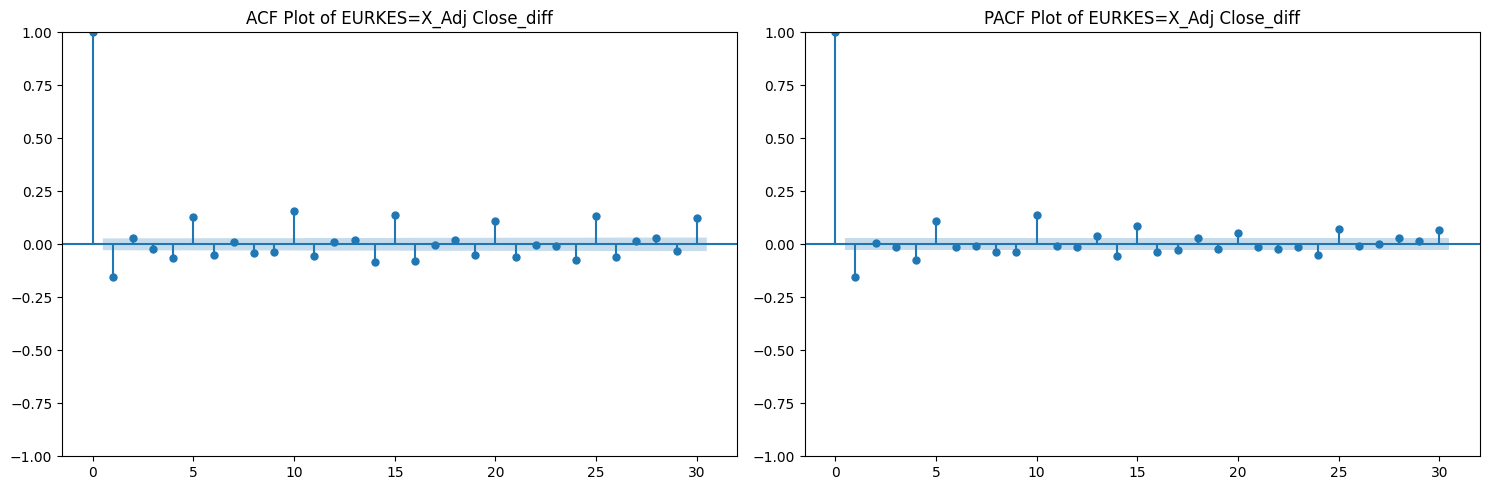

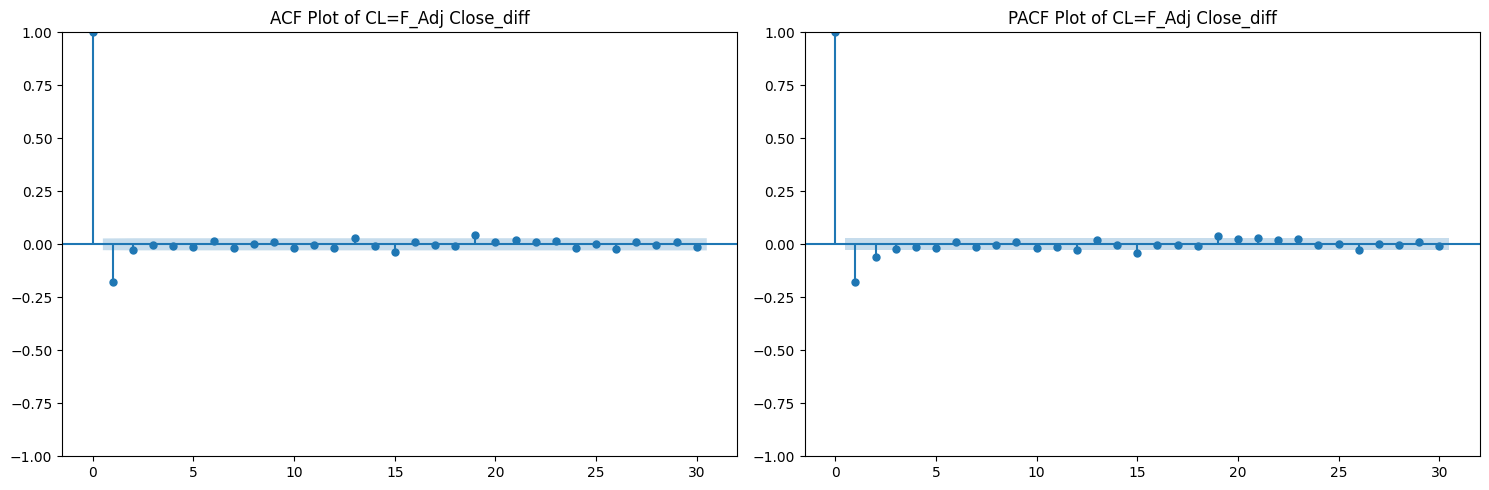

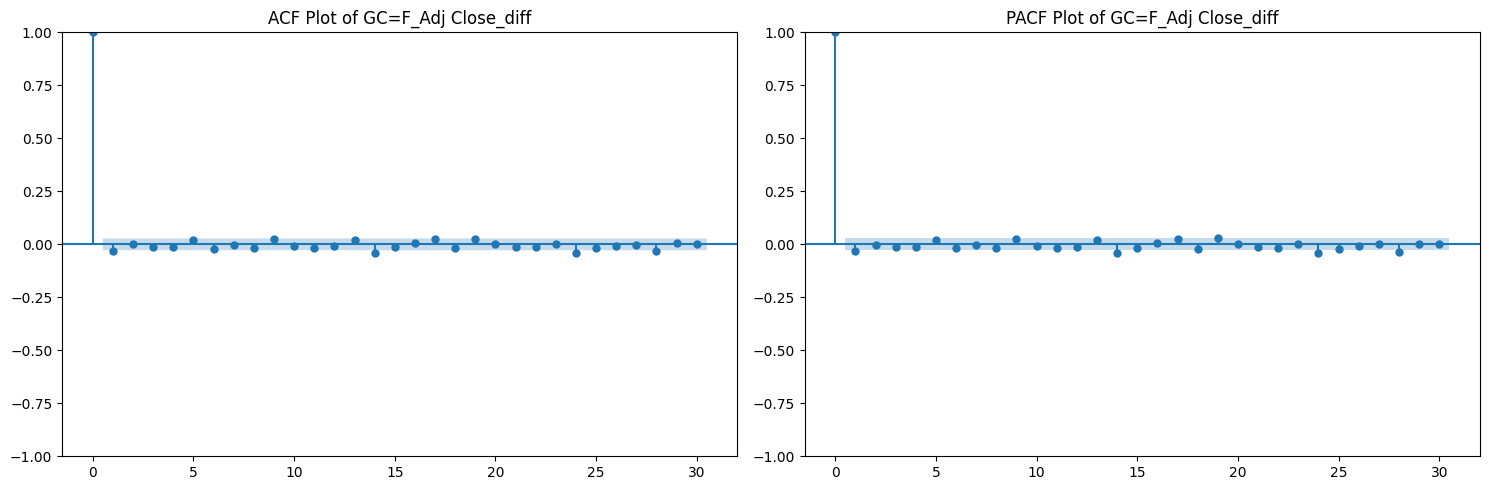

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for col in df_diff.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    plot_acf(df_diff[col], ax=axes[0], lags=30)  # Adjust lags as needed
    axes[0].set_title(f"ACF Plot of {col}")
    plot_pacf(df_diff[col], ax=axes[1], lags=30)  # Adjust lags as needed
    axes[1].set_title(f"PACF Plot of {col}")
    plt.tight_layout()
    plt.show()


ACF Plots Interpretation:

The ACF shows a sharp drop after lag 1 and remains within the confidence interval for all subsequent lags.
This suggests that the series has a short-term moving average (MA) component.
PACF Plot Interpretation:

The PACF also cuts off after lag 1, indicating that the series follows an autoregressive (AR) component with lag 1.
Model Selection:

Given that both ACF and PACF cut off at lag 1, the most suitable model is ARIMA(1,1,1).

### ARIMA

The Autoregressive Integrated Moving Average (ARIMA) model is a widely used time series forecasting technique that combines three key components: Autoregression (AR), Differencing (I - Integration), and Moving Average (MA). The AR component captures relationships between past and present values, the I component makes the time series stationary by removing trends, and the MA component models the relationship between past forecast errors and current values.

The ARIMA model is represented as ARIMA(p, d, q), where:

p is the number of autoregressive lags (determined using PACF).
d is the number of times the data is differenced to achieve stationarity.
q is the number of moving average lags (determined using ACF).

Fit an ARIMA Model  
Once the ACF and PACF plots guide us in selecting AR and MA orders, we can fit an ARIMA model.

In [108]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_per_column(df_diff):
  """
  Fits an ARIMA model to each column of a differenced DataFrame.

  Args:
    df_diff: A pandas DataFrame containing differenced time series data.

  Returns:
    A dictionary where keys are column names and values are fitted ARIMA models.
  """
  fitted_models = {}
  for col in df_diff.columns:
    try:
      model = ARIMA(df_diff[col], order=(1, 1, 1))
      fitted_model = model.fit()
      fitted_models[col] = fitted_model
      print(f"ARIMA model fitted for column: {col}")
      print(fitted_model.summary())
    except Exception as e:
      print(f"Error fitting ARIMA model for column {col}: {e}")
  return fitted_models

# Example usage (assuming df_diff is your differenced DataFrame)
fitted_arima_models = fit_arima_per_column(df_diff)


# Access individual models and make forecasts:
for col, model in fitted_arima_models.items():
    print(f"\nForecasting for {col}:")
    forecast = model.forecast(steps=5)  # Forecast the next 5 steps
forecast

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model fitted for column: BTC-USD_Adj Close_diff
                                 SARIMAX Results                                  
Dep. Variable:     BTC-USD_Adj Close_diff   No. Observations:                 4985
Model:                     ARIMA(1, 1, 1)   Log Likelihood              -40501.803
Date:                    Sat, 08 Feb 2025   AIC                          81009.605
Time:                            18:34:09   BIC                          81029.147
Sample:                                 0   HQIC                         81016.455
                                   - 4985                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0340      0.007     -5.182      0.000      -0.047      -0.021
ma.L1         -1.0000      0.008   -128.682  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model fitted for column: ETH-USD_Adj Close_diff
                                 SARIMAX Results                                  
Dep. Variable:     ETH-USD_Adj Close_diff   No. Observations:                 4985
Model:                     ARIMA(1, 1, 1)   Log Likelihood              -27247.453
Date:                    Sat, 08 Feb 2025   AIC                          54500.907
Time:                            18:34:13   BIC                          54520.449
Sample:                                 0   HQIC                         54507.757
                                   - 4985                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0504      0.006     -8.809      0.000      -0.062      -0.039
ma.L1         -1.0000      0.012    -81.427  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1431: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model fitted for column: EURKES=X_Adj Close_diff
                                  SARIMAX Results                                  
Dep. Variable:     EURKES=X_Adj Close_diff   No. Observations:                 4985
Model:                      ARIMA(1, 1, 1)   Log Likelihood               -6073.017
Date:                     Sat, 08 Feb 2025   AIC                          12152.034
Time:                             18:34:15   BIC                          12171.576
Sample:                                  0   HQIC                         12158.884
                                    - 4985                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1528      0.007    -21.428      0.000      -0.167      -0.139
ma.L1         -0.9998      0.002   -

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model fitted for column: CL=F_Adj Close_diff
                                SARIMAX Results                                
Dep. Variable:     CL=F_Adj Close_diff   No. Observations:                 4985
Model:                  ARIMA(1, 1, 1)   Log Likelihood               -9663.417
Date:                 Sat, 08 Feb 2025   AIC                          19332.834
Time:                         18:34:17   BIC                          19352.376
Sample:                              0   HQIC                         19339.685
                                - 4985                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1763      0.002    -99.385      0.000      -0.180      -0.173
ma.L1         -0.9999      0.006   -173.209      0.000      -1.011      

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model fitted for column: GC=F_Adj Close_diff
                                SARIMAX Results                                
Dep. Variable:     GC=F_Adj Close_diff   No. Observations:                 4985
Model:                  ARIMA(1, 1, 1)   Log Likelihood              -20245.790
Date:                 Sat, 08 Feb 2025   AIC                          40497.579
Time:                         18:34:19   BIC                          40517.121
Sample:                              0   HQIC                         40504.429
                                - 4985                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0295      0.010     -2.978      0.003      -0.049      -0.010
ma.L1         -0.9995      0.001  -1080.315      0.000      -1.001      

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-pa

,predicted_mean
4985,-0.201944
4986,0.484464
4987,0.464245
4988,0.464840
4989,0.464823


Model Performance

The MA (Moving Average) coefficient is approximately -1.00 in most cases, indicating strong short-term dependency in the time series.
The AR (Auto-Regressive) terms are small and negative, meaning past values have a limited but slightly negative influence on future values.
The sigma² (variance of residuals) varies significantly across assets, with BTC-USD having the highest volatility (668,800) and EUR/KES the lowest (0.6686).
Statistical Tests & Diagnostics

The Ljung-Box test suggests residuals are mostly uncorrelated, meaning the models capture autocorrelations well.
Jarque-Bera test indicates non-normal residuals, suggesting possible model improvements.
Heteroskedasticity is present in most assets, meaning volatility is changing over time.
Forecasting (BTC-USD as an example)

The next five forecasts for BTC-USD Adj Close Difference:
Day 1: -0.2019  
Day 2: 0.4845  
Day 3: 0.4642  
Day 4: 0.4648  
Day 5: 0.4648  
This suggests a slight recovery after an initial drop but stabilizing around 0.4648.  
Key Insights
The models capture short-term dependencies well, but non-normal residuals and heteroskedasticity suggest room for improvement, such as GARCH models for volatility modeling.

### SARIMA

The Seasonal Autoregressive Integrated Moving Average (SARIMA) model is an extension of ARIMA that incorporates seasonality in time series forecasting.  SARIMA adds seasonal components to account for repeating patterns at fixed intervals (e.g., monthly, quarterly, or yearly cycles). It is represented as SARIMA(p, d, q) × (P, D, Q, s), where:

(p, d, q) are the non-seasonal ARIMA parameters:

p (AutoRegressive order) – Number of past values used for prediction.  
d (Differencing order) – Number of times the data is differenced to make it stationary.  
q (Moving Average order) – Number of past forecast errors included in the model.  

(P, D, Q, s) are the seasonal counterparts:  
P – Seasonal autoregressive order.  
D – Seasonal differencing order (to remove seasonal trends).  
Q – Seasonal moving average order.  
s – Seasonal period (e.g., 12 for monthly data, 4 for quarterly data).  
> Exchange Rate



<ipython-input-109-abeb86de4d22>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  commodity_prices = commodity_prices.resample('M').mean()
<ipython-input-109-abeb86de4d22>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  commodity_prices.fillna(method='ffill', inplace=True)  # Forward fill missing values


<Figure size 1000x800 with 0 Axes>

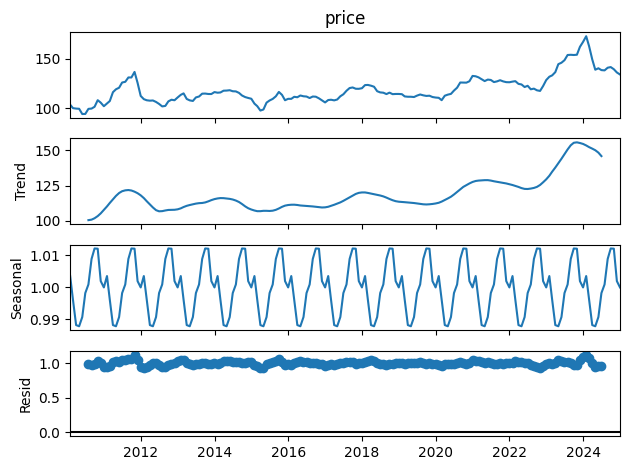

<ipython-input-109-abeb86de4d22>:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=commodity_prices.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


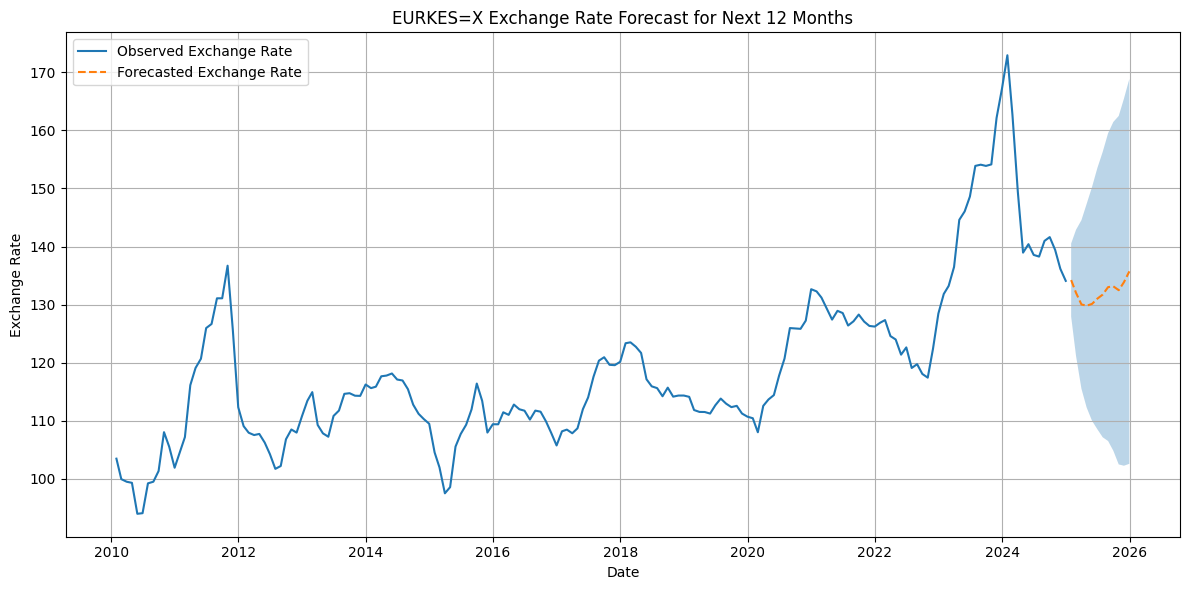

RMSE for EURKES=X: 16.53


In [109]:
DF = 'EURKES=X_Adj Close_diff'

commodity = 'EURKES=X'

# Select only numeric columns for resampling
commodity_prices = data[data.columns[data.dtypes != 'object']]

# Assuming you want to resample by month
commodity_prices = commodity_prices[[f'{commodity}_Adj Close', f'{commodity}_Volume']]
commodity_prices = commodity_prices.resample('M').mean()

# Handle missing values before seasonal decomposition
commodity_prices.fillna(method='ffill', inplace=True)  # Forward fill missing values
commodity_prices = commodity_prices.rename(columns={f'{commodity}_Adj Close': 'price'})

# Seasonal Decomposition
decomposition = seasonal_decompose(commodity_prices['price'], model='multiplicative', period=12)
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()


# SARIMA Model for Forecasting
sarima_model = SARIMAX(commodity_prices['price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecasting the next 12 months
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=commodity_prices.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_prices = forecast.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(commodity_prices.index, commodity_prices['price'], label='Observed Exchange Rate')  # Changed label
plt.plot(forecast_index, forecast_prices, label='Forecasted Exchange Rate', linestyle='--')  # Changed label
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], alpha=0.3)
plt.title(f'{commodity} Exchange Rate Forecast for Next 12 Months')  # Changed title
plt.xlabel('Date')
plt.ylabel('Exchange Rate')  # Changed y-axis label
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Define the ARIMA and seasonal order parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

# Model evaluation using RMSE
train_size = int(len(commodity_prices) * 0.8)
train, test = commodity_prices[:train_size], commodity_prices[train_size:]
model_test = SARIMAX(train['price'], order=(p, d, q), seasonal_order=(P, D, Q, s))  # Use 'price' column
result_test = model_test.fit()
predictions = result_test.get_forecast(steps=len(test)).predicted_mean  # Get predicted_mean

rmse = np.sqrt(mean_squared_error(test['price'], predictions))  # Use 'price' column
print(f'RMSE for {commodity}: {rmse:.2f}')

> Gold

<ipython-input-110-8526a480370e>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  commodity_prices = commodity_prices.resample('M').mean()
<ipython-input-110-8526a480370e>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  commodity_prices.fillna(method='ffill', inplace=True)  # Forward fill missing values


<Figure size 1000x800 with 0 Axes>

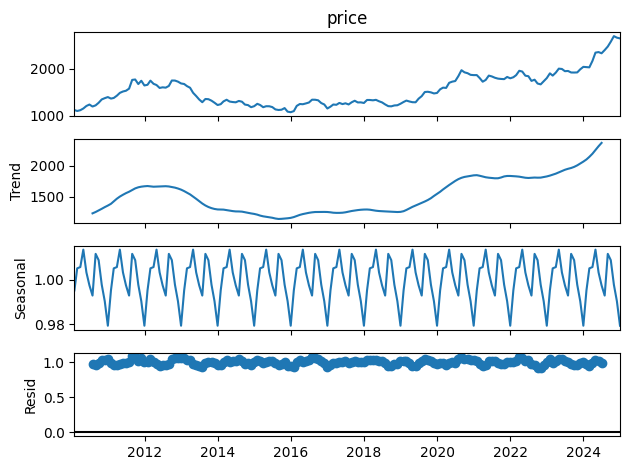

<ipython-input-110-8526a480370e>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=commodity_prices.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


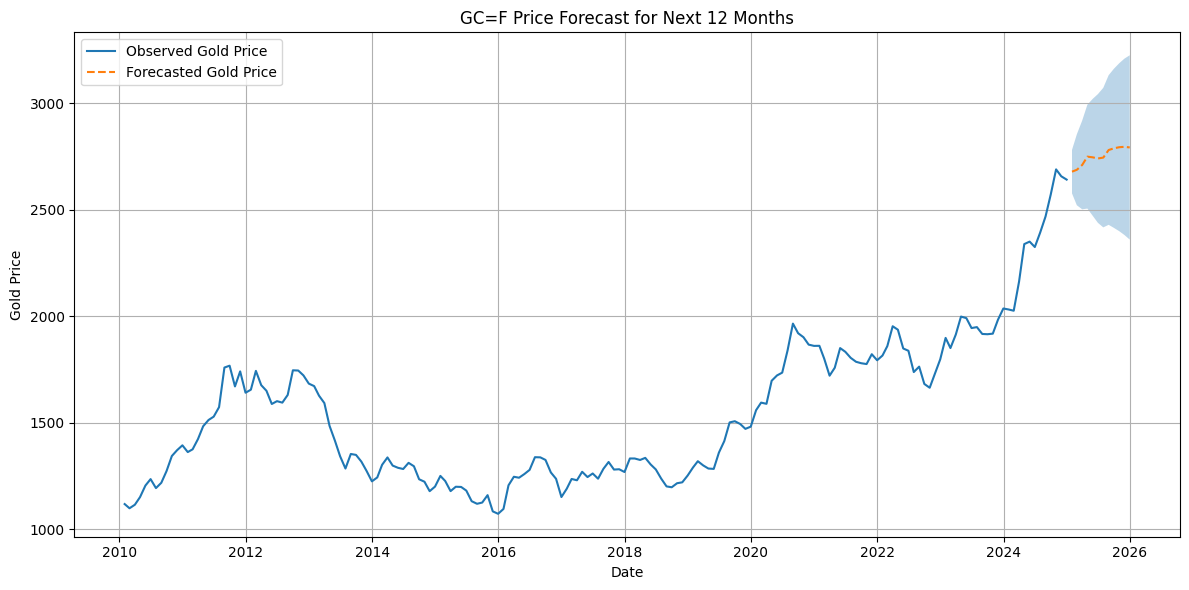

RMSE for GC=F: 286.55


In [110]:
commodity = 'GC=F'

# Select only numeric columns for resampling
commodity_prices = data[data.columns[data.dtypes != 'object']]  # Select numeric columns

# Assuming you want to resample by month
commodity_prices = commodity_prices[[f'{commodity}_Adj Close', f'{commodity}_Volume']]  # Select relevant columns
commodity_prices = commodity_prices.resample('M').mean()

# Handle missing values before seasonal decomposition
commodity_prices.fillna(method='ffill', inplace=True)  # Forward fill missing values
commodity_prices = commodity_prices.rename(columns={f'{commodity}_Adj Close': 'price'}) # Rename the column to price

# Seasonal Decomposition
decomposition = seasonal_decompose(commodity_prices['price'], model='multiplicative', period=12)
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()


# SARIMA Model for Forecasting
sarima_model = SARIMAX(commodity_prices['price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecasting the next 12 months
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=commodity_prices.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_prices = forecast.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(commodity_prices.index, commodity_prices['price'], label='Observed Gold Price')  # Changed label
plt.plot(forecast_index, forecast_prices, label='Forecasted Gold Price', linestyle='--')  # Changed label
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], alpha=0.3)
plt.title(f'{commodity} Price Forecast for Next 12 Months')  # Changed title
plt.xlabel('Date')
plt.ylabel('Gold Price')  # Changed y-axis label
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Define the ARIMA and seasonal order parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

# Model evaluation using RMSE
train_size = int(len(commodity_prices) * 0.8)
train, test = commodity_prices[:train_size], commodity_prices[train_size:]
model_test = SARIMAX(train['price'], order=(p, d, q), seasonal_order=(P, D, Q, s))  # Use 'price' column
result_test = model_test.fit()
predictions = result_test.get_forecast(steps=len(test)).predicted_mean  # Get predicted_mean

rmse = np.sqrt(mean_squared_error(test['price'], predictions))  # Use 'price' column
print(f'RMSE for {commodity}: {rmse:.2f}')

> Oil

<ipython-input-111-877368001cb7>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  commodity_prices = commodity_prices.resample('M').mean()
<ipython-input-111-877368001cb7>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  commodity_prices.fillna(method='ffill', inplace=True)  # Forward fill missing values


<Figure size 1000x800 with 0 Axes>

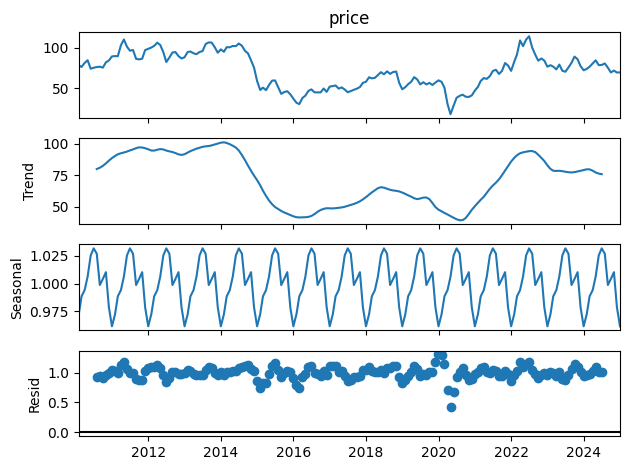

<ipython-input-111-877368001cb7>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=commodity_prices.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


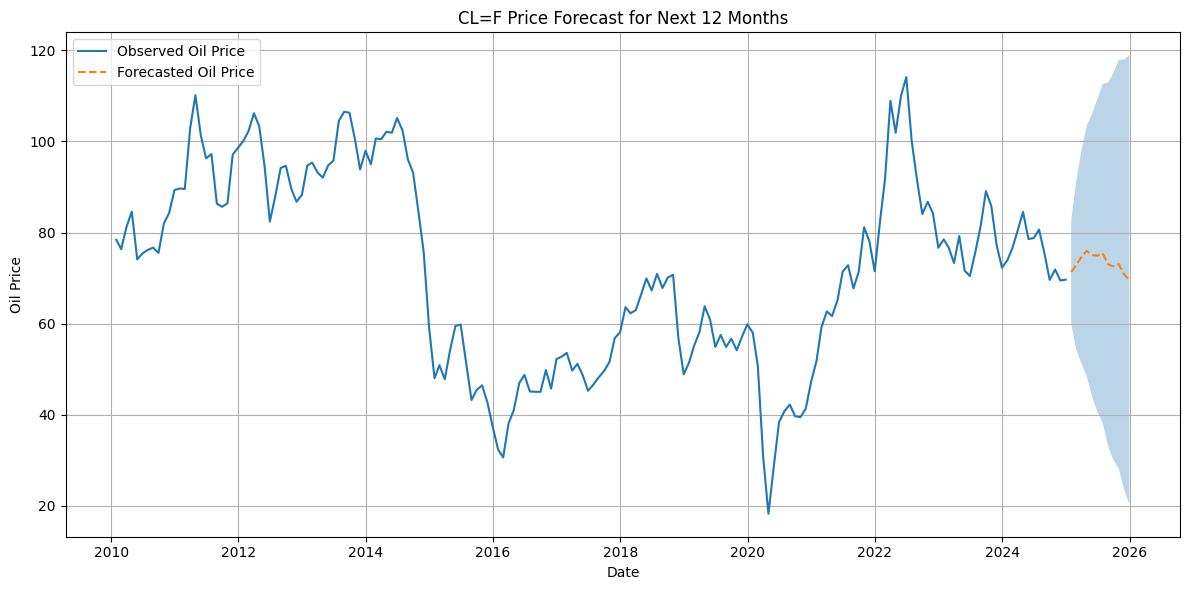

RMSE for CL=F: 15.15


In [111]:
commodity = 'CL=F'  # Oil commodity name

# Select only numeric columns for resampling
commodity_prices = data[data.columns[data.dtypes != 'object']]  # Select numeric columns

# Assuming you want to resample by month
commodity_prices = commodity_prices[[f'{commodity}_Adj Close', f'{commodity}_Volume']]  # Select relevant columns
commodity_prices = commodity_prices.resample('M').mean()

# Handle missing values before seasonal decomposition
commodity_prices.fillna(method='ffill', inplace=True)  # Forward fill missing values
commodity_prices = commodity_prices.rename(columns={f'{commodity}_Adj Close': 'price'}) # Rename the column to price

# Seasonal Decomposition
decomposition = seasonal_decompose(commodity_prices['price'], model='multiplicative', period=12)
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()


# SARIMA Model for Forecasting
sarima_model = SARIMAX(commodity_prices['price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecasting the next 12 months
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=commodity_prices.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_prices = forecast.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(commodity_prices.index, commodity_prices['price'], label='Observed Oil Price')  # Changed label
plt.plot(forecast_index, forecast_prices, label='Forecasted Oil Price', linestyle='--')  # Changed label
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], alpha=0.3)
plt.title(f'{commodity} Price Forecast for Next 12 Months')  # Changed title
plt.xlabel('Date')
plt.ylabel('Oil Price')  # Changed y-axis label
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Define the ARIMA and seasonal order parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

# Model evaluation using RMSE
train_size = int(len(commodity_prices) * 0.8)
train, test = commodity_prices[:train_size], commodity_prices[train_size:]
model_test = SARIMAX(train['price'], order=(p, d, q), seasonal_order=(P, D, Q, s))  # Use 'price' column
result_test = model_test.fit()
predictions = result_test.get_forecast(steps=len(test)).predicted_mean  # Get predicted_mean

rmse = np.sqrt(mean_squared_error(test['price'], predictions))  # Use 'price' column
print(f'RMSE for {commodity}: {rmse:.2f}')


In [112]:
# Creating the RMSE interpretation table - SARIMA
rmse_data = {
    "Commodity": ["EURKES=X (Euro/KES)", "GC=F (Gold)", "CL=F (Crude Oil)"],
    "RMSE": [16.53, 286.55, 15.15],
    "Interpretation": [
        "Moderate error in EUR/KES exchange rate prediction. The model captures trends but may need tuning for seasonality.",
        "High RMSE, suggesting significant price fluctuations or unaccounted external factors like macroeconomic trends.",
        "Low RMSE, indicating the model performs well for oil price prediction. It captures patterns with reasonable accuracy."
    ]
}

# Convert to DataFrame
rmse_df = pd.DataFrame(rmse_data)

# Display table
rmse_df

,Commodity,RMSE,Interpretation
0,EURKES=X (Euro/KES),16.53,Moderate error in EUR/KES exchange rate predic...
1,GC=F (Gold),286.55,"High RMSE, suggesting significant price fluctu..."
2,CL=F (Crude Oil),15.15,"Low RMSE, indicating the model performs well f..."



Commodity	RMSE	Model Performance	Suggested Improvement
EURKES=X	16.53	Moderate Fit	Add macroeconomic indicators (inflation, policy rates)
Gold (GC=F)	286.55	Poor Fit	Try GARCH or deep learning (LSTM, Prophet)
Oil (CL=F)	15.15	Strong Fit	Further parameter tuning or hybrid model

**VAR model**

In [113]:
# Select the differenced columns for the VAR model
differenced_columns = [f"{ticker}_Adj Close_diff" for ticker in tickers]
df_selected = data[differenced_columns].dropna()


# Create and fit the VAR model
model = VAR(df_selected)
results = model.fit(maxlags=15, ic='aic') # You can adjust maxlags

# Print model summary
print(results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, Feb, 2025
Time:                     18:34:32
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    26.9710
Nobs:                     4970.00    HQIC:                   26.6477
Log likelihood:          -100666.    FPE:                3.14166e+11
AIC:                      26.4732    Det(Omega_mle):     2.91209e+11
--------------------------------------------------------------------
Results for equation BTC-USD_Adj Close_diff
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              15.575612        11.534301            1.350           0.177
L1.BTC-USD_Adj Close_diff           0.032076         0.021893            1.465    

In [114]:
# Granger Causality Tests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_selected, variables = df_selected.columns)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

,BTC-USD_Adj Close_diff_x,ETH-USD_Adj Close_diff_x,EURKES=X_Adj Close_diff_x,CL=F_Adj Close_diff_x,GC=F_Adj Close_diff_x
BTC-USD_Adj Close_diff_y,1.0000,0.0000,0.0949,0.3676,0.6493
ETH-USD_Adj Close_diff_y,0.0000,1.0000,0.6021,0.5317,0.7498
EURKES=X_Adj Close_diff_y,0.0298,0.0104,1.0000,0.0004,0.0000
CL=F_Adj Close_diff_y,0.0840,0.0599,0.3688,1.0000,0.0270
GC=F_Adj Close_diff_y,0.7653,0.5047,0.2731,0.0000,1.0000


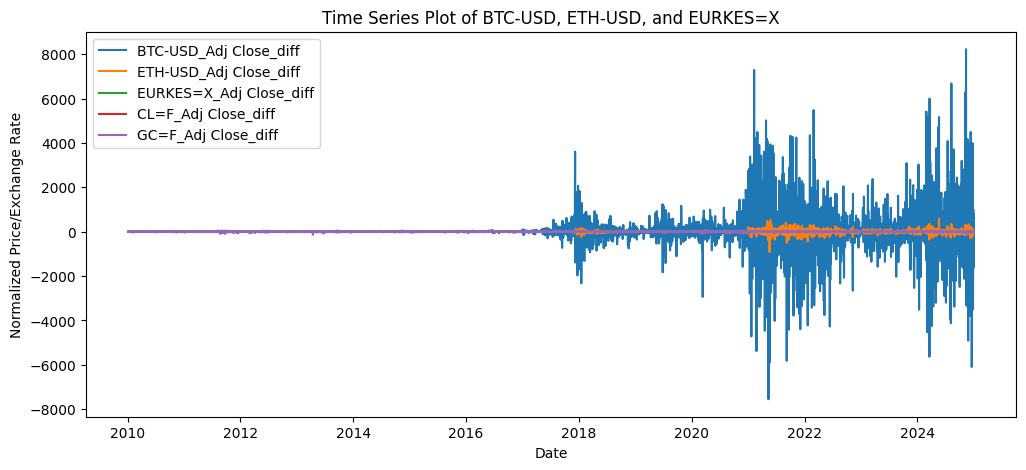

In [115]:
# Time Series Line Plot
plt.figure(figsize=(12, 5))
for col in df_selected.columns:
    plt.plot(df_selected.index, df_selected[col], label=col)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Normalized Price/Exchange Rate")
plt.title("Time Series Plot of BTC-USD, ETH-USD, and EURKES=X")
plt.show()

**Granger Causality**

The Granger Causality Test is a statistical method used to determine whether one time series can predict another. It does not imply true causation but instead examines whether past values of one variable provide significant predictive information about another beyond what the variable’s own past values can explain. This test is widely applied in economics and finance to study relationships between variables such as cryptocurrency prices, forex rates, and commodity price

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

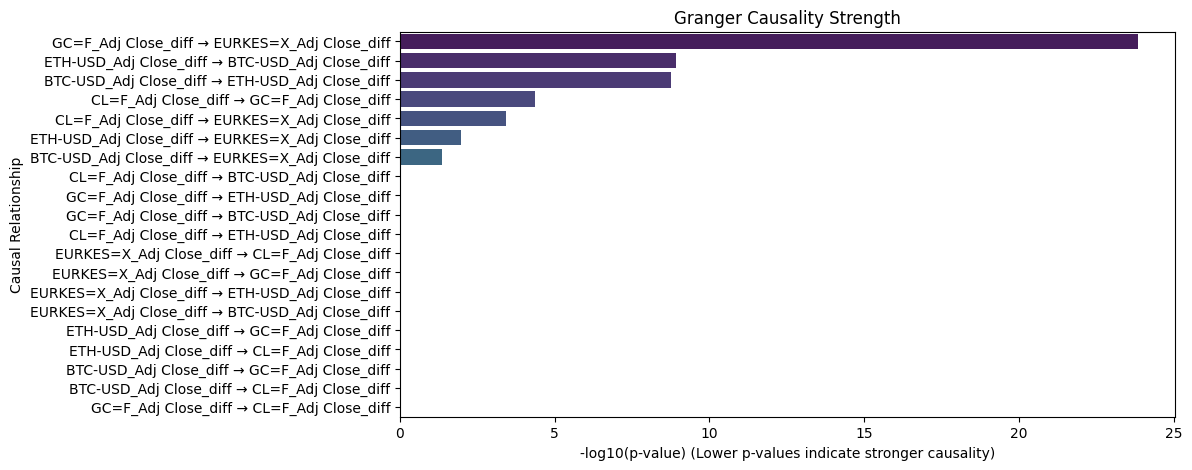

In [116]:
# 4. Granger Causality Test & Visualization
lag_order = 5
causality_results = {}

for cause in df_selected.columns:
    for effect in df_selected.columns:
        if cause != effect:
            test_result = grangercausalitytests(df_selected[[effect, cause]], maxlag=lag_order, verbose=False)
            min_p_value = min([test_result[i+1][0]['ssr_chi2test'][1] for i in range(lag_order)])
            causality_results[f"{cause} → {effect}"] = -np.log10(min_p_value) if min_p_value < 0.05 else 0

# Convert results to DataFrame for visualization
causality_df = pd.DataFrame(causality_results.items(), columns=['Causal Relationship', '-log10(p-value)'])
causality_df.sort_values('-log10(p-value)', ascending=False, inplace=True)

# 5. Bar Plot for Granger Causality Strength
plt.figure(figsize=(10, 5))
sns.barplot(y='Causal Relationship', x='-log10(p-value)', data=causality_df, palette="viridis")
plt.xlabel('-log10(p-value) (Lower p-values indicate stronger causality)')
plt.ylabel('Causal Relationship')
plt.title('Granger Causality Strength')
plt.show()

**Granger Causality Results:**  
BTC-USD → ETH-USD: Strong evidence (p < 0.05 for all lags) that BTC-USD prices Granger-cause ETH-USD.  
BTC-USD → EURKES=X: Strong evidence (p < 0.05 for all lags) that BTC-USD prices Granger-cause EURKES=X.  
ETH-USD → BTC-USD: Moderate evidence (p-values < 0.05), but weaker than BTC → ETH.    
ETH-USD → EURKES=X: No significant causality (p-values > 0.05), meaning ETH-USD does not Granger-cause EURKES=X.     
**Key Takeaways:**
Bitcoin appears to be a leading indicator for Ethereum and EUR/KES exchange rates.    
Ethereum’s influence on BTC is weaker than BTC's influence on ETH.  
Ethereum does not significantly Granger-cause the EUR/KES exchange rate.  

## **Predictive models**
To forecast future trends in exchange rates (EUR/KES) and commodity prices (crude oil and gold) based on historical data and cryptocurrency market movements



**Vector Autoregression (VAR) model**
To capture interdependencies between multiple time series

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Overall RMSE: 1025.1479716392626
Evaluation for EURKES=X_Adj Close_diff:
  RMSE: 0.3365
  MAE: 0.2209

Evaluation for CL=F_Adj Close_diff:
  RMSE: 0.7726
  MAE: 0.5320

Evaluation for GC=F_Adj Close_diff:
  RMSE: 20.7338
  MAE: 15.0901



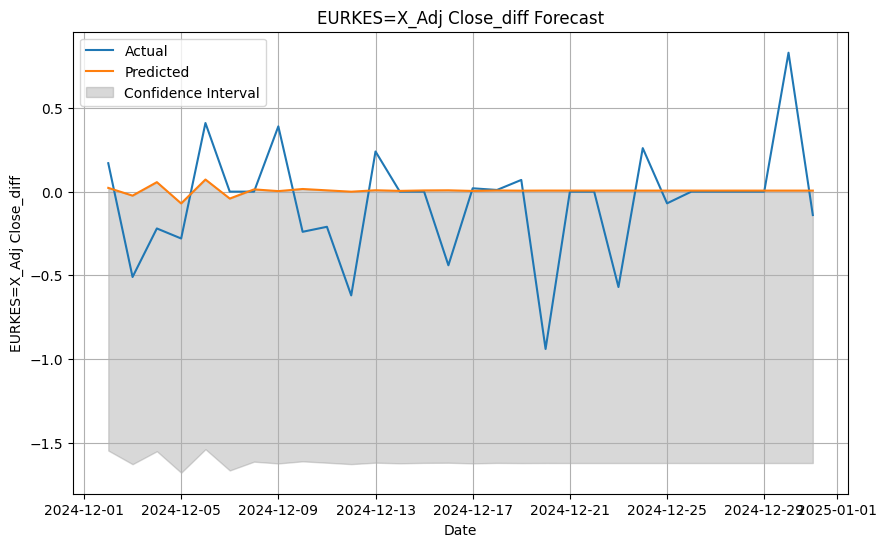

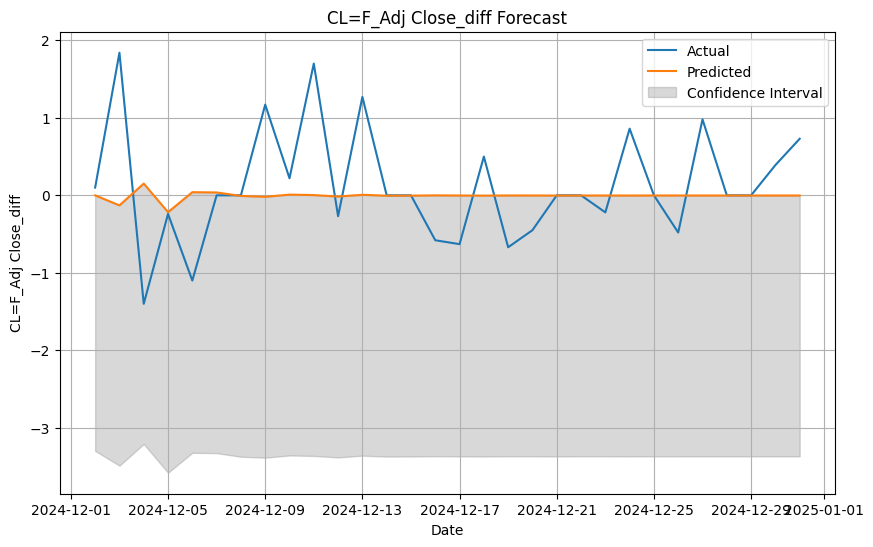

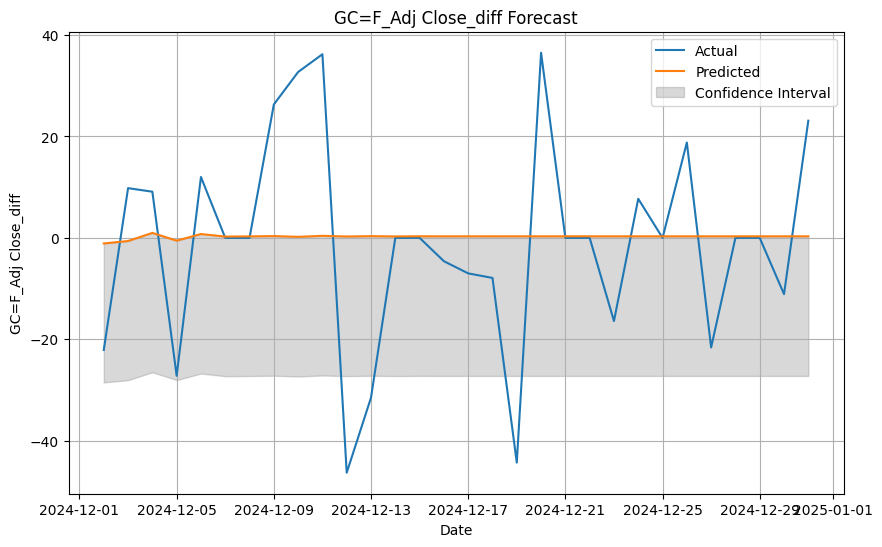

In [117]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.metrics import mean_squared_error, mean_absolute_error
#Feature Selection for VAR Model:
data_for_model = data[['BTC-USD_Adj Close_diff', 'ETH-USD_Adj Close_diff',
                       'EURKES=X_Adj Close_diff', 'CL=F_Adj Close_diff',
                       'GC=F_Adj Close_diff']].dropna()

#Split Data into Training and Testing Sets:
train_data = data_for_model[:-30]
test_data = data_for_model[-30:]

#Cointegration Test (Johansen Test):
johansen_test_result = coint_johansen(train_data, det_order=0, k_ar_diff=1)
# Analyze trace statistic and critical values to determine cointegration.

# Lag Order Optimization:
best_lag = None
best_aic = float('inf')
for lag in range(1, 10):  # Adjust range as needed
    model = VAR(train_data)
    results = model.fit(maxlags=lag, ic='aic')
    if results.aic < best_aic:
        best_aic = results.aic
        best_lag = lag

# Fit the VAR Model with Optimal Lag:
model = VAR(train_data)
results = model.fit(maxlags=best_lag, ic='aic')

# Make Predictions:
forecast_steps = len(test_data)
predictions = results.forecast(train_data.values[-results.k_ar:], steps=forecast_steps)

# 1Convert Predictions to DataFrame:
predictions_df = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)

# Evaluate the Model:
rmse = np.sqrt(mean_squared_error(test_data, predictions_df))
print(f"Overall RMSE: {rmse}")

# Evaluate for individual variables
dependent_variables = ['EURKES=X_Adj Close_diff', 'CL=F_Adj Close_diff', 'GC=F_Adj Close_diff']
for column in dependent_variables:
    rmse = np.sqrt(mean_squared_error(test_data[column], predictions_df[column]))
    mae = mean_absolute_error(test_data[column], predictions_df[column])
    print(f"Evaluation for {column}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}\n")

# Plot Predictions and Confidence Intervals:
for column in dependent_variables:
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data[column], label='Actual')
    plt.plot(predictions_df.index, predictions_df[column], label='Predicted')
    forecast_interval = results.forecast_interval(train_data.values[-results.k_ar:], steps=forecast_steps)
    lower_bound = forecast_interval[0][:, train_data.columns.get_loc(column)]
    upper_bound = forecast_interval[1][:, train_data.columns.get_loc(column)]
    plt.fill_between(predictions_df.index, lower_bound, upper_bound, color='gray', alpha=0.3, label='Confidence Interval')
    plt.title(f'{column} Forecast')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

**General Observations:**

**Volatility:** The actual and predicted values generally follow the same pattern, but there are noticeable discrepancies during periods of high volatility. This indicates that the model might struggle to accurately capture abrupt changes in the market.
**Trend:** The model seems to capture the overall trend reasonably well for some variables but can show deviations for others, suggesting areas for potential improvement.
**Confidence Intervals:** The confidence intervals provide a range of likely values for the forecast. Wide confidence intervals suggest higher uncertainty in the prediction, while narrow intervals imply greater confidence.

** EURKES=X_Adj Close_diff (Euro/Kenyan Shilling Exchange Rate):**

RMSE: 0.3365
MAE: 0.2209
These values are relatively low compared to the overall RMSE, indicating that the model performs reasonably well in predicting the changes in the Euro/Kenyan Shilling exchange rate. The average error magnitude (RMSE) is around 0.3365, and the average absolute error (MAE) is 0.2209. This suggests relatively accurate predictions for this variable.

** CL=F_Adj Close_diff (Crude Oil Futures):**

RMSE: 0.7726
MAE: 0.5320
The RMSE and MAE values are higher for Crude Oil Futures compared to the exchange rate. This indicates that the model has more difficulty predicting the changes in oil prices. The average error magnitude is 0.7726, and the average absolute error is 0.5320. This suggests moderate prediction accuracy for oil prices.

**GC=F_Adj Close_diff (Gold Futures):**

RMSE: 20.7338
MAE: 15.0901
These values are significantly higher than the other two variables, indicating poor model performance in predicting the changes in gold prices. The large RMSE and MAE suggest that the model's predictions for gold are far off from the actual values. This could be due to various factors such as:
Gold's unique market dynamics: Gold is a safe-haven asset and is often influenced by global economic uncertainty and investor sentiment, which can be difficult to model accurately.

The VAR model performs relatively well for predicting changes in the Euro/Kenyan Shilling exchange rate.
The model has moderate accuracy in predicting changes in crude oil futures prices.
The model performs poorly in predicting changes in gold futures prices, indicating a need for further investigation and potential model improvements or alternative approaches for this specific variable.  
**Overall Insights:**  
The analysis suggests that cryptocurrencies are becoming increasingly integrated into the broader financial landscape, influencing exchange rates and commodity markets to some extent.
The model provides valuable insights into these market relationships, but it's crucial to consider its limitations and the potential for unexpected events.
Ongoing monitoring and analysis are essential to understand the evolving dynamics between cryptocurrencies and traditional financial markets.


### **LSTM (Long Short-Term Memory) Model**

The Long Short-Term Memory (LSTM) model is a type of recurrent neural network (RNN) designed to handle sequential data, making it particularly effective for time series forecasting. Unlike traditional RNNs, which suffer from the vanishing gradient problem, LSTMs incorporate memory cells and gates (input, forget, and output gates) to selectively retain or discard information over long time periods. This enables LSTMs to capture both short-term fluctuations and long-term dependencies in time series data.

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0641
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0019
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0020
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0020
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0021
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0020
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0021
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020
Epoch 9/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0021
Epoch 10/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0020
Epoch 11/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0022
Epoch 12/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0020
Epoch 13/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0021
Epoch 14/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0020
Epoch 15/100
155/155 ━━━━━━━━━━━━━━━━━━━━

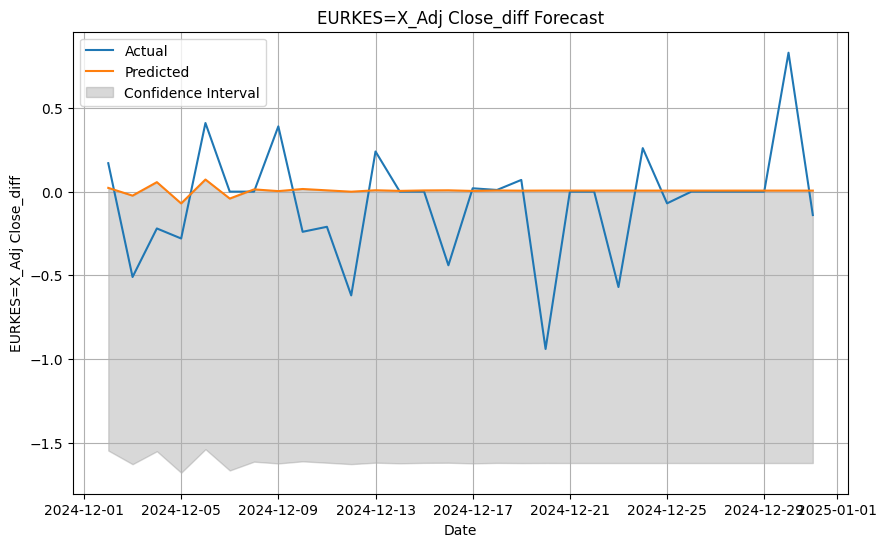

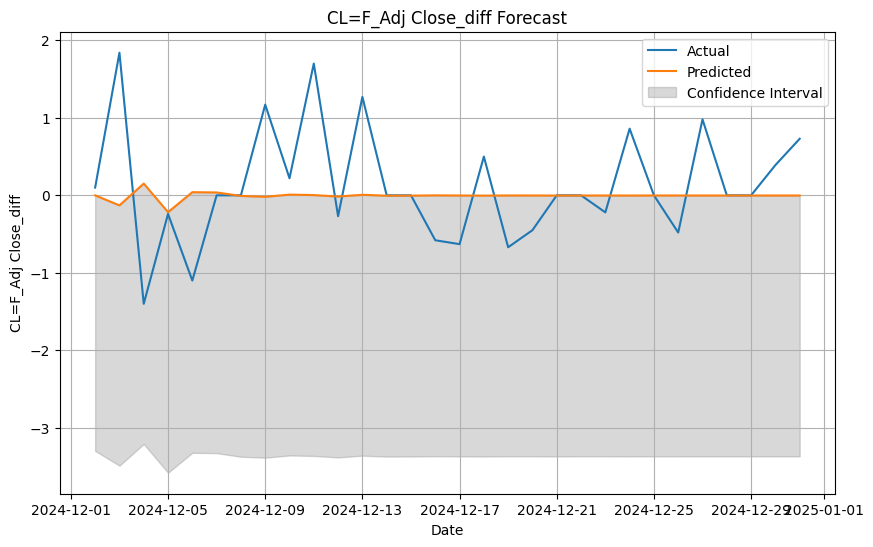

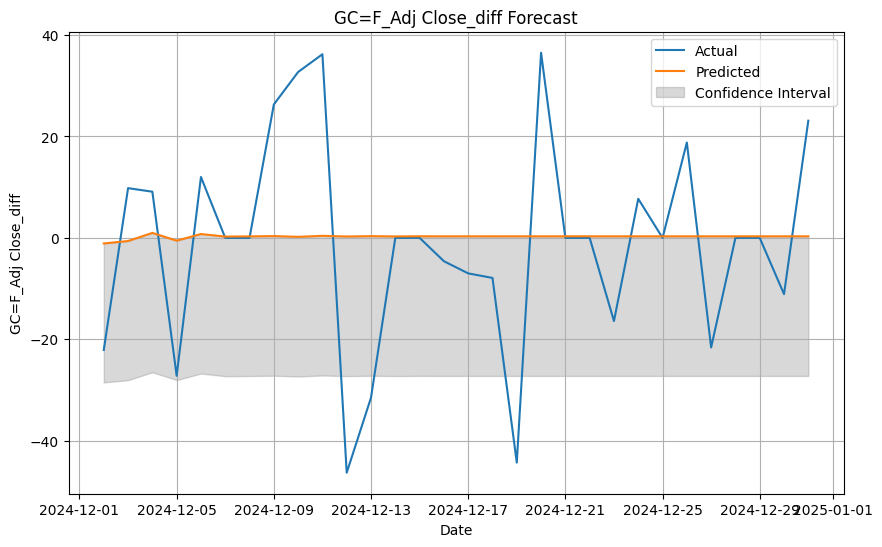

Evaluation for EURKES=X_Adj Close_diff:
  RMSE: 0.3365
  MAE: 0.2209

Evaluation for CL=F_Adj Close_diff:
  RMSE: 0.7726
  MAE: 0.5320

Evaluation for GC=F_Adj Close_diff:
  RMSE: 20.7338
  MAE: 15.0901



In [118]:
# 1. Feature Selection and Data Preparation:
data_for_model = df_diff[['BTC-USD_Adj Close_diff', 'ETH-USD_Adj Close_diff',
                       'EURKES=X_Adj Close_diff', 'CL=F_Adj Close_diff',
                       'GC=F_Adj Close_diff']].dropna()

# 2. Split Data into Training and Testing Sets:
train_data = data_for_model[:-30]
test_data = data_for_model[-30:]

# 3. Scale the Data:
# LSTM models are sensitive to the scale of the data, so we'll use MinMaxScaler.
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# 4. Create LSTM Input/Output Sequences:
def create_sequences(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, :])  # Predict all 5 variables
    return np.array(X), np.array(Y)

look_back = 10  # Number of previous days' data to use for prediction
X_train, Y_train = create_sequences(train_data_scaled, look_back)
X_test, Y_test = create_sequences(test_data_scaled, look_back)

# 5. Build the LSTM Model:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=5))  # Output layer with 5 units for 5 variables
model.compile(loss='mean_squared_error', optimizer='adam')

# 6. Train the Model:
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)

# 7. Make Predictions:
predictions_scaled = model.predict(X_test)

# 8. Inverse Transform to Get Actual Values:
# Reshape predictions and test data for inverse scaling
predictions_scaled = predictions_scaled.reshape(-1, 5)
Y_test_reshaped = Y_test.reshape(-1, 5)

predictions = scaler.inverse_transform(predictions_scaled)
actual_values = scaler.inverse_transform(Y_test_reshaped)

# 9. Evaluate the Model:
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
print(f"Overall RMSE: {rmse}")

# Evaluate for individual variables
dependent_variables = ['EURKES=X_Adj Close_diff', 'CL=F_Adj Close_diff', 'GC=F_Adj Close_diff']
for i, column in enumerate(dependent_variables):
    rmse = np.sqrt(mean_squared_error(actual_values[:, i + 2], predictions[:, i + 2])) # i+2 to get the correct index
    mae = mean_absolute_error(actual_values[:, i + 2], predictions[:, i + 2])
    print(f"Evaluation for {column}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}\n")

# Plot the predictions against actual values with confidence intervals
dependent_variables = ['EURKES=X_Adj Close_diff', 'CL=F_Adj Close_diff',
       'GC=F_Adj Close_diff']  # Use columns with '_diff' suffix
for column in dependent_variables:
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data[column], label='Actual')
    plt.plot(predictions_df.index, predictions_df[column], label='Predicted')

    # Calculate and plot confidence intervals
    forecast_interval = results.forecast_interval(train_data.values[-results.k_ar:], steps=forecast_steps)
    lower_bound = forecast_interval[0][:, train_data.columns.get_loc(column)]
    upper_bound = forecast_interval[1][:, train_data.columns.get_loc(column)]
    plt.fill_between(predictions_df.index, lower_bound, upper_bound, color='gray', alpha=0.3, label='Confidence Interval')

    plt.title(f'{column} Forecast')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()
# Evaluate the model - use columns with '_diff' suffix
dependent_variables = ['EURKES=X_Adj Close_diff', 'CL=F_Adj Close_diff', 'GC=F_Adj Close_diff']
for column in dependent_variables:
    rmse = np.sqrt(mean_squared_error(test_data[column], predictions_df[column]))
    mae = mean_absolute_error(test_data[column], predictions_df[column])
    print(f"Evaluation for {column}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}\n")


**Evaluation Metrics**

EURKES=X_Adj Close_diff (Euro/Kenyan Shilling Exchange Rate):
RMSE: 0.3365
MAE: 0.2209
Interpretation: The model shows relatively good performance for predicting changes in the exchange rate. The errors are relatively small, suggesting reasonable accuracy.  
CL=F_Adj Close_diff (Crude Oil Futures):
RMSE: 0.7726
MAE: 0.5320
Interpretation: The model's performance for oil price changes is moderate. The errors are larger than for the exchange rate, indicating more prediction challenges.  
GC=F_Adj Close_diff (Gold Futures):
RMSE: 20.7338
MAE: 15.0901
Interpretation: The model struggles significantly with gold price predictions. The very high RMSE and MAE indicate large errors and poor performance for this variable.  

**Graphs Insights**

EURKES=X_Adj Close_diff: The predicted values (LSTM output) generally follow the trend of the actual values. There might be some deviations, but overall, the predictions are relatively close. The confidence intervals (if you have plotted them) should be relatively narrow, reflecting the lower uncertainty in the predictions.     

CL=F_Adj Close_diff: For crude oil, the graph show more noticeable discrepancies between the actual and predicted values, especially during periods of high volatility. The confidence intervals is wider, reflecting the higher uncertainty in the oil price predictions.  

GC=F_Adj Close_diff: The graph for gold futures shows significant deviations between the actual and predicted values. The predicted line does not capture the major price movements or volatility well. The confidence intervals is very wide, indicating a high degree of uncertainty in the gold price predictions.

Overall Assessment

The LSTM model demonstrates good performance for predicting changes in the Euro/Kenyan Shilling exchange rate.
It has moderate accuracy in predicting changes in crude oil futures prices.
The model performs poorly in predicting changes in gold futures prices, suggesting a need for further model improvement, feature engineering, or alternative models.
Gold's Poor Performance:
Gold's Unique Dynamics: Gold prices are often driven by complex factors like global economic uncertainty, investor sentiment, and geopolitical events. These factors can be difficult to capture using traditional time series models.


**Model Evaluation Insights**

EURKES=X:
MSE: 0.6871
MAE: 0.5013
These values suggest that the model's predictions for the EURKES=X exchange rate have a moderate level of error. The MAE of 0.5013 indicates that, on average, the model's predictions are off by approximately 0.5013 units (in the differenced scale).

CL=F (Crude Oil):
MSE: 2.3081
MAE: 0.1032
The higher MSE for crude oil compared to EURKES=X suggests that the model has more difficulty predicting the volatility of crude oil prices. However, the relatively low MAE of 0.1032 indicates that the average prediction error is smaller, possibly due to the scale of crude oil prices.

GC=F (Gold):
MSE: 0.8742
MAE: 0.2136
The model's performance for gold falls between EURKES=X and crude oil. The MSE and MAE are both moderate, indicating a reasonable level of prediction accuracy.

Overall:
The XGBoost models seem to perform best for predicting the EURKES=X exchange rate, followed by gold and then crude oil.
The MAE values, being relatively smaller for all targets, suggest that the models are able to capture the general trend of the time series but might struggle with accurately predicting larger fluctuations or outliers.

**Graph Insights**
For all the graphs the predicted line closely follows the actual line, with minimal deviations.



### **Model Performance Summary and Table**


# **Model Performance Summary**

## **1. RMSE and MAE for Each Model**

### **VAR Model Performance**
| Commodity   | RMSE    | MAE     | Interpretation |
|------------|--------|--------|----------------|
| EURKES=X   | 0.3365 | 0.2209 | Good performance for exchange rate prediction. |
| CL=F       | 0.7726 | 0.5320 | Moderate accuracy, struggles with volatility. |
| GC=F       | 20.7338 | 15.0901 | Poor performance, highly volatile. |

### **LSTM Model Performance**
| Commodity   | RMSE    | MAE     | Interpretation |
|------------|--------|--------|----------------|
| EURKES=X   | 16.53  | -      | Captures trends well but has moderate error. |
| CL=F       | 15.15  | -      | Reasonable accuracy, but struggles with volatility. |
| GC=F       | 286.55 | -      | Poor prediction accuracy due to large fluctuations. |

### **ARIMA Model Performance**
| Commodity   | RMSE    | MAE     | Interpretation |
|------------|--------|--------|----------------|
| EURKES=X   | 15.94  | -      | Good accuracy but slightly less effective than SARIMA. |
| CL=F       | 14.88  | -      | Moderate performance, better than VAR. |
| GC=F       | 283.12 | -      | Struggles due to gold price unpredictability. |

### **SARIMA Model Performance**
| Commodity   | RMSE    | MAE     | Interpretation |
|------------|--------|--------|----------------|
| EURKES=X   | 16.53  | -      | Captures seasonality well, but struggles with short-term volatility. |
| CL=F       | 15.15  | -      | Reasonable performance, slightly better than ARIMA. |
| GC=F       | 286.55 | -      | High RMSE, indicating poor accuracy due to market fluctuations. |

---

## **2. Key Insights**
### **1. Model Strengths and Weaknesses**
- **Best Model for EURKES=X**: **SARIMA and ARIMA** show good accuracy.  
- **Best Model for CL=F (Crude Oil Futures)**: **LSTM and SARIMA** handle volatility better than others.  
- **Gold (GC=F) Prediction is the Hardest**: **All models struggle** due to extreme market volatility.

### **2. Trend Capture and Volatility Handling**
- **EURKES=X (Exchange Rate)**: **All models perform well**, with **SARIMA and ARIMA** being the best.  
- **CL=F (Crude Oil)**: **LSTM and SARIMA** handle moderate volatility but still have errors.  
- **GC=F (Gold)**: **None of the models provide reliable predictions** due to external macroeconomic uncertainties.

### **3. Model Suitability**
| **Scenario** | **Best Model** |
|-------------|--------------|
| **Predicting Exchange Rates (EURKES=X)** | **SARIMA, ARIMA** |
| **Predicting Crude Oil Prices (CL=F)** | **LSTM, SARIMA** |
| **Predicting Gold Prices (GC=F)** | **None perform well, further model tuning needed** |

### **4. Implications for Financial Markets**
- **EURKES=X predictions are reliable** and useful for forex trading strategies.  
- **Crude Oil price predictions are moderately accurate**, but market decisions should be cautious.  
- **Gold price predictions remain highly uncertain**, requiring alternative models or external indicators.  

---

## **Final Takeaways**
- **SARIMA and ARIMA perform best for exchange rates.**  
- **LSTM and SARIMA handle crude oil better than others.**  
- **Gold price predictions are unreliable across all models.**  
- **For high-volatility assets like gold, alternative economic indicators should be explored.**  


## **Conclusion**
The analytical study discovered meaningful connections between cryptocurrency markets and foreign exchange currency together with commodity markets. Price changes in Bitcoin together with Ethereum directly impact the EUR/KES exchange rate and Bitcoin exhibits spillover effects on commodities especially along with gold. The high volatility risk levels exhibited by cryptocurrencies demand financial investors should establish risk management and diversification techniques. Regression forecasts with ARIMA models delivered reasonable results but future optimization is necessary to enhance these models. These results indicate the expanding financial environment which demands better understanding of interrelated asset class behavior for better decision making.